In [1]:
import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import pickle

Previously run on home desktop

In [2]:
# df_business = pd.read_json(r"C:\Users\wlee\Documents\Non Work Related\Metis\Data\yelp_academic_dataset_business.json", lines=True)

# df_business['city'] = df_business['city'].str.upper()
# df_business['state'] = df_business['state'].str.upper()

# with open('Data/yelp_biz.pickle', 'wb') as f:
#     pickle.dump(df_business, f, protocol=4)

In [3]:
with open('Data/yelp_biz.pickle', 'rb') as f:
    df_business = pickle.load(f)

In [4]:
city_states = df_business.groupby(['city','state']).size().reset_index().sort_values(by=0,ascending=False)
print(city_states[city_states['state']=='BC'].head())
print()
print(city_states[city_states['state']=='BC'].tail())

                city state      0
683        VANCOUVER    BC  10301
581         RICHMOND    BC   1793
119          BURNABY    BC   1728
491  NORTH VANCOUVER    BC    926
173        COQUITLAM    BC    652

               city state  0
253  FRASER HEIGHTS    BC  1
377        LOUGHEED    BC  1
367       LIONS BAY    BC  1
338       KITSILANO    BC  1
328         KELOWNA    BC  1


In [5]:
df_bcbiz = df_business[df_business['state']=='BC']

In [6]:
df_bcbiz.head()

business_id                     name  \
5   D4JtQNTI4X3KcbzacDJsMw      Bob Likes Thai Food   
21  AvT2mGkdYwU0ghqDfs-OlQ   Tire Town Auto Service   
33  QciD6FbNklaJvUbLExD4Nw                     ARGO   
47  Xi2GGNzOiUS8r6WCFvu-fw           Kerala Kitchen   
48  0b9OJG4DWUqhdLotm_La7Q  Mid Century Modern Home   

                      address       city state postal_code   latitude  \
5                3755 Main St  VANCOUVER    BC         V5V  49.251342   
21     2032 Hastings Street E  VANCOUVER    BC     V5L 1T8  49.281059   
33  3790 Canada Way, Unit 108    BURNABY    BC     V5G 1G4  49.254436   
47       103- 9386 120 Street     SURREY    BC     V3V 4B9  49.173723   
48              1041 Kingsway  VANCOUVER    BC     V5V 3C7  49.253741   

     longitude  stars  review_count  is_open  \
5  -123.101333    3.5           169        1   
21 -123.063019    4.0             6        0   
33 -123.020050    4.0            76        1   
47 -122.889641    4.0             9        1   
48 -123.082838    3.5             9        1   

                                           attributes  \
5   {'GoodForKids': 'True', 'Alcohol': 'u'none'', ...   
21                                               None   
33  {'WheelchairAccessible': 'False', 'Restaurants...   
47  {'BusinessParking': '{'garage': False, 'street...   
48  {'RestaurantsPriceRange2': '3', 'BusinessParki...   

                                           categories  \
5                                   Restaurants, Thai   
21                     Auto Repair, Automotive, Tires   
33  Food Delivery Services, Food, Restaurants, Med...   
47                                Indian, Restaurants   
48  Home & Garden, Furniture Stores, Shopping, Ant...   

                                                hours  
5   {'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...  
21  {'Monday': '9:0-17:30', 'Tuesday': '9:0-17:30'...  
33  {'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',...  
47  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...  
48  {'Monday': '11:0-18:0', 'Wednesday': '11:0-18:...

# Import Map of Vancouver's Neighborhoods

In [7]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import shapely.speedups

shapely.speedups.enable()

In [8]:
vancouvermap = gpd.read_file('Vancouver Geo Files/local-area-boundary.shp')
print(vancouvermap.columns)
vancouvermap.head()

Index(['mapid', 'name', 'geometry'], dtype='object')


mapid               name                                           geometry
0    DS  Dunbar-Southlands  POLYGON ((-123.17017 49.24789, -123.17025 49.2...
1  KERR         Kerrisdale  POLYGON ((-123.17908 49.21556, -123.17870 49.2...
2   KIL          Killarney  POLYGON ((-123.02356 49.20015, -123.03998 49.2...
3  KITS          Kitsilano  POLYGON ((-123.13768 49.27532, -123.14375 49.2...
4    SC       South Cambie  POLYGON ((-123.11599 49.23794, -123.11617 49.2...

# Import Coordinates of Vancouver's Bus Stops

In [9]:
busstops = gpd.read_file('Vancouver Geo Files/Vancouver Bus Stops.geojson')

for row in vancouvermap.iterrows():
#     print(row[1]['name'])
    invan_mask = busstops.within(row[1]['geometry'])
    busstops.loc[invan_mask,'neighborhood'] = row[1]['name']

busstops = busstops[busstops['neighborhood'].notnull()]
busstops.head()

stop_id stop_code                             stop_name  \
32      208     50207     NB GRANVILLE ST FS N CONNAUGHT DR   
33      209     50208         NB GRANVILLE ST FS NANTON AVE   
34      210     50209  NB GRANVILLE ST FS W KING EDWARD AVE   
35      211     50210        NB GRANVILLE ST FS BALFOUR AVE   
36      212     50211       NB GRANVILLE ST FS MATTHEWS AVE   

                           stop_desc   stop_lat    stop_lon zone_id stop_url  \
32     GRANVILLE ST @ N CONNAUGHT DR  49.245722 -123.139081   ZN 99            
33         GRANVILLE ST @ NANTON AVE  49.247690 -123.139023   ZN 99            
34  GRANVILLE ST @ W KING EDWARD AVE  49.250127 -123.138924   ZN 99            
35        GRANVILLE ST @ BALFOUR AVE  49.252263 -123.138834   ZN 99            
36       GRANVILLE ST @ MATTHEWS AVE  49.253467 -123.138804   ZN 99            

    location_type  parent_station                     geometry neighborhood  
32              0             NaN  POINT (-123.13908 49.24572)  Shaughnessy  
33              0             NaN  POINT (-123.13902 49.24769)  Shaughnessy  
34              0             NaN  POINT (-123.13892 49.25013)  Shaughnessy  
35              0             NaN  POINT (-123.13883 49.25226)  Shaughnessy  
36              0             NaN  POINT (-123.13880 49.25347)  Shaughnessy

# Import Coordinates of Vancouver's Rapid Transit Stations

In [10]:
rt_stations = gpd.read_file('Vancouver Geo Files/Vancouver Rapid Transit Stations.geojson')

rt_stations.head()

station       geo_local_area                     geometry
0              MARINE DRIVE              Marpole  POINT (-123.11707 49.20955)
1               VCC - CLARK           Strathcona  POINT (-123.07896 49.26578)
2                   NANAIMO  Renfrew-Collingwood  POINT (-123.05587 49.24827)
3  MAIN ST. - SCIENCE WORLD             Downtown  POINT (-123.10061 49.27318)
4       STADIUM - CHINATOWN             Downtown  POINT (-123.10956 49.27944)

# Construct GeoPandas DataFrame for Yelp Businesses in Vancouver

In [11]:
points = [Point(xy) for xy in zip(df_business['longitude'] , df_business['latitude'])]
geo_df = gpd.GeoDataFrame(df_business,
                          crs=vancouvermap.crs,
                          geometry=points)

for row in vancouvermap.iterrows():
    print(row[1]['name'])
    invan_mask = geo_df.within(row[1]['geometry'])
    geo_df.loc[invan_mask,'neighborhood'] = row[1]['name']

vangeo_df = geo_df[geo_df['neighborhood'].notnull()].reset_index(drop=True)

Dunbar-Southlands
Kerrisdale
Killarney
Kitsilano
South Cambie
Victoria-Fraserview
Arbutus-Ridge
Downtown
Fairview
Grandview-Woodland
Hastings-Sunrise
Marpole
Riley Park
Shaughnessy
Strathcona
West End
Kensington-Cedar Cottage
Mount Pleasant
Oakridge
Renfrew-Collingwood
Sunset
West Point Grey


# Generate Businesses Stacked by Single Category

In [12]:
# Prep data for stacking of business by category

# replace commas with semi-colons to split within categories column
vangeo_df['categories']=vangeo_df['categories'].str.replace(",",";")
# undo for exceptions
vangeo_df['categories']=vangeo_df['categories'].str.replace("Beer; Wine & Spirits","Beer, Wine & Spirits")
vangeo_df['categories']=vangeo_df['categories'].str.replace("Wills; Trusts; & Probates","Wills, Trusts, & Probates")
vangeo_df['categories']=vangeo_df['categories'].str.replace("Books; Mags; Music & Video",'Books, Mags, Music & Video')
vangeo_df['categories']=vangeo_df['categories'].str.replace("Used; Vintage & Consignment",'Used, Vintage & Consignment')

# remove Sushi Bars from places that also list restaurants as Japanese
vangeo_df.loc[
    (vangeo_df['categories'].str.contains('Japanese'))
    & (vangeo_df['categories'].str.contains('Sushi Bars'))
    , 'categories'
            ] = vangeo_df['categories'].str.replace("Sushi Bars",'')

vangeo_df.head()

business_id                          name  \
0  D4JtQNTI4X3KcbzacDJsMw           Bob Likes Thai Food   
1  AvT2mGkdYwU0ghqDfs-OlQ        Tire Town Auto Service   
2  0b9OJG4DWUqhdLotm_La7Q       Mid Century Modern Home   
3  iX6_gILIkLUpO1r1BzwfvA                  Park Theatre   
4  zml5p2_hrHNDumKqsWGvfA  Community Thrift and Vintage   

                  address       city state postal_code   latitude   longitude  \
0            3755 Main St  VANCOUVER    BC         V5V  49.251342 -123.101333   
1  2032 Hastings Street E  VANCOUVER    BC     V5L 1T8  49.281059 -123.063019   
2           1041 Kingsway  VANCOUVER    BC     V5V 3C7  49.253741 -123.082838   
3      3440 Cambie Street  VANCOUVER    BC     V5Z 2W8  49.254479 -123.114869   
4      311 Carrall Street  VANCOUVER    BC     V6B 2J4  49.282218 -123.104458   

   stars  review_count  is_open  \
0    3.5           169        1   
1    4.0             6        0   
2    3.5             9        1   
3    4.0            31        1   
4    4.5            20        1   

                                          attributes  \
0  {'GoodForKids': 'True', 'Alcohol': 'u'none'', ...   
1                                               None   
2  {'RestaurantsPriceRange2': '3', 'BusinessParki...   
3                            {'GoodForKids': 'True'}   
4  {'RestaurantsPriceRange2': '2', 'BusinessParki...   

                                          categories  \
0                                  Restaurants; Thai   
1                     Auto Repair; Automotive; Tires   
2  Home & Garden; Furniture Stores; Shopping; Ant...   
3                       Cinema; Arts & Entertainment   
4  Shopping; Accessories; Fashion; Thrift Stores;...   

                                               hours  \
0  {'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...   
1  {'Monday': '9:0-17:30', 'Tuesday': '9:0-17:30'...   
2  {'Monday': '11:0-18:0', 'Wednesday': '11:0-18:...   
3                                               None   
4  {'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'...   

                      geometry              neighborhood  
0  POINT (-123.10133 49.25134)                Riley Park  
1  POINT (-123.06302 49.28106)        Grandview-Woodland  
2  POINT (-123.08284 49.25374)  Kensington-Cedar Cottage  
3  POINT (-123.11487 49.25448)                Riley Park  
4  POINT (-123.10446 49.28222)                  Downtown

In [13]:
vangeo_df[vangeo_df['name'].str.contains('Dinesty')]

business_id                    name             address  \
974  JgSGpSMHbGecAXs_o1rE_g  Dinesty Dumpling House  1719 Robson Street   

          city state postal_code   latitude   longitude  stars  review_count  \
974  VANCOUVER    BC     V6G 1C8  49.290818 -123.134391    4.0           782   

     is_open                                         attributes  \
974        1  {'RestaurantsTakeOut': 'True', 'BusinessParkin...   

                                            categories  \
974  Chinese; Restaurants; Dumplings; Bubble Tea; Food   

                                                 hours  \
974  {'Monday': '17:0-20:30', 'Tuesday': '17:0-20:3...   

                        geometry neighborhood  
974  POINT (-123.13439 49.29082)     West End

In [14]:
# Step 1 of stacking businesses by category

# split by comma
category_series = vangeo_df['categories'].str.split('; ')

# replace null values with empty string to denote no category listed for a business
category_series.fillna(value='', inplace=True) 
category_series.head()

0                                  [Restaurants, Thai]
1                     [Auto Repair, Automotive, Tires]
2    [Home & Garden, Furniture Stores, Shopping, An...
3                       [Cinema, Arts & Entertainment]
4    [Shopping, Accessories, Fashion, Thrift Stores...
Name: categories, dtype: object

In [15]:
# Step 2 of stacking businesses by category
# Create dataframe from split values series and set index to business_id 
category_df = pd.DataFrame(category_series.tolist(),index=vangeo_df['business_id'])
print(category_df.loc[:,:2].head())

# stack
stacked_categories = category_df.stack()

# reset index to make business_id a column again and rename category column
stacked_categories = stacked_categories.reset_index(['business_id'])
stacked_categories = stacked_categories.rename(columns={0:'single category'})

# remove blank categories
stacked_categories = stacked_categories[stacked_categories['single category'] != '']
stacked_categories.head()

                                    0                     1         2
business_id                                                          
D4JtQNTI4X3KcbzacDJsMw    Restaurants                  Thai      None
AvT2mGkdYwU0ghqDfs-OlQ    Auto Repair            Automotive     Tires
0b9OJG4DWUqhdLotm_La7Q  Home & Garden      Furniture Stores  Shopping
iX6_gILIkLUpO1r1BzwfvA         Cinema  Arts & Entertainment      None
zml5p2_hrHNDumKqsWGvfA       Shopping           Accessories   Fashion


business_id single category
0  D4JtQNTI4X3KcbzacDJsMw     Restaurants
1  D4JtQNTI4X3KcbzacDJsMw            Thai
0  AvT2mGkdYwU0ghqDfs-OlQ     Auto Repair
1  AvT2mGkdYwU0ghqDfs-OlQ      Automotive
2  AvT2mGkdYwU0ghqDfs-OlQ           Tires

# Import list of yelp main business categories

In [16]:
f = open("Data/view-source_https___blog.yelp.com_2018_01_yelp_category_list.html", "r",encoding="utf-8")
page = f.read()
soup = BeautifulSoup(page)
soup.find_all('span' ,style="font-weight: 400;")
first_h2 = soup.h2
my_h2s = first_h2.find_all_next('h2',attrs={'class': None})

yelp_categories = []
for h2 in my_h2s:
    if h2.find('a') != None:
        yelp_categories.append(h2.text.strip())
print(len(yelp_categories))
yelp_categories

22


['Active Life',
 'Arts & Entertainment',
 'Automotive',
 'Beauty & Spas',
 'Education',
 'Event Planning & Services',
 'Financial Services',
 'Food',
 'Health & Medical',
 'Home Services',
 'Hotels & Travel',
 'Local Flavor',
 'Local Services',
 'Mass Media',
 'Nightlife',
 'Pets',
 'Professional Services',
 'Public Services & Government',
 'Real Estate',
 'Religious Organizations',
 'Restaurants',
 'Shopping']

# Generate Restaurants Dataset

In [17]:
vanrestaurants = vangeo_df[vangeo_df['categories'].str.contains("Restaurants",na=False)].copy()

# Generating Bayesian estimate of star rating means
min_reviews = vanrestaurants['review_count'].min()
mean_stars =  vanrestaurants['stars'].mean()

print(f"The minimum number of reviews in the restaurants dataset is {min_reviews}")
print(f"The mean star reviews in the restaurants dataset is {mean_stars}")

def bayes_stars(row):
    """
    Calculates Bayesian estimate of star rating means based on the
    minimum number of reviews in the dataset, the mean star rating,
    and the current listing's review and rating.
    In effect, the calculated rating reduces noise due to low sample counts;
    the less a title has votes, the more it is pulled towards the mean. 
    """
    R = row.stars 
    V = row.review_count
    C = mean_stars
    M = min_reviews
    bayes_stars = ((V / (V+M)) * R) + (M / (V+M)) * C
    return bayes_stars

vanrestaurants['bayes_stars'] = vanrestaurants.apply(bayes_stars,axis=1)
print(f'There are {len(vanrestaurants)} restaurants in this dataset')
vanrestaurants.head(5)

The minimum number of reviews in the restaurants dataset is 5
The mean star reviews in the restaurants dataset is 3.521556886227545
There are 4175 restaurants in this dataset


business_id                         name  \
0   D4JtQNTI4X3KcbzacDJsMw          Bob Likes Thai Food   
8   jfDfHzAq6iKkRnzzZ4n1nQ  Let's Roll Custom Sushi Bar   
9   OfA_4cHgvlknHMcn0qNs2w               Little Caesars   
16  7ee6XyKyeduI-Rbc6L5j2Q            NingTu Restaurant   
17  r-hWf-bd9im5rj_l2MeofQ              Take Five CafÃ©   

                          address       city state postal_code   latitude  \
0                    3755 Main St  VANCOUVER    BC         V5V  49.251342   
8   1184 Denman Street, Suite 104  VANCOUVER    BC     V6G 2M9  49.286360   
9                7010 Kerr Street  VANCOUVER    BC         V5S  49.219532   
16                  2130 Kingsway  VANCOUVER    BC     V5N 2T5  49.244079   
17       102-609 Granville Street  VANCOUVER    BC     V7Y 1H4  49.283532   

     longitude  stars  review_count  is_open  \
0  -123.101333    3.5           169        1   
8  -123.140261    4.5            31        0   
9  -123.040893    1.0             9        1   
16 -123.063337    4.0            60        0   
17 -123.117107    4.0            17        1   

                                           attributes  \
0   {'GoodForKids': 'True', 'Alcohol': 'u'none'', ...   
8   {'RestaurantsAttire': 'u'casual'', 'HasTV': 'F...   
9   {'GoodForKids': 'True', 'RestaurantsReservatio...   
16  {'RestaurantsGoodForGroups': 'True', 'NoiseLev...   
17  {'BikeParking': 'True', 'WiFi': ''free'', 'Res...   

                                           categories  \
0                                   Restaurants; Thai   
8   Restaurants; Canadian (New); Sushi Bars; Ameri...   
9                                  Restaurants; Pizza   
16                               Restaurants; Chinese   
17             Food; Coffee & Tea; Restaurants; Cafes   

                                                hours  \
0   {'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...   
8   {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
9   {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...   
16  {'Monday': '17:30-21:30', 'Tuesday': '17:30-21...   
17                                               None   

                       geometry              neighborhood  bayes_stars  
0   POINT (-123.10133 49.25134)                Riley Park     3.500619  
8   POINT (-123.14026 49.28636)                  West End     4.364105  
9   POINT (-123.04089 49.21953)                 Killarney     1.900556  
16  POINT (-123.06334 49.24408)  Kensington-Cedar Cottage     3.963197  
17  POINT (-123.11711 49.28353)                  Downtown     3.891263

# Clustering

In [18]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#### All Businesses

In [19]:
vanbusinesses = vangeo_df.copy()

X = vanbusinesses[['latitude','longitude']]

X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.06, min_samples=10).fit(X)
kmeans= KMeans(n_clusters=40,random_state=42).fit(X)

labels_db = db.labels_
labels_km = kmeans.labels_

labels = labels_db

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

vanbusinesses['clusters'] = labels
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels
                                                                )
     )


Estimated number of clusters: 53
Estimated number of noise points: 755
Silhouette Coefficient: 0.072


#### Restaurants

Identify local maximum of silhouette score for DBSCAN Algorithm

In [20]:
# X = vanrestaurants[['latitude','longitude']]
# X = StandardScaler().fit_transform(X)

# sil = []
# myrange = np.arange(0.06,0.2,0.01)
# for eps in myrange:
#     db_test = DBSCAN(eps=eps, min_samples=6).fit(X)
#     labels_test = db_test.labels_
#     sil.append(silhouette_score(X, labels_test, metric = 'euclidean'))
    
# plt.plot(myrange,sil);

Identify local maximum of silhouette score for KMeans Algorithm

In [21]:
# X = vanrestaurants[['latitude','longitude']]
# X = StandardScaler().fit_transform(X)

# sil = []
# myrange = np.arange(120,160,1)
# for k in myrange:
#     kmeans_test = KMeans(n_clusters = k).fit(X)
#     labels_test = kmeans_test.labels_
#     sil.append(silhouette_score(X, labels_test, metric = 'euclidean'))
    
# print(f"Highest Silhouette Score at {myrange[np.argmax(sil)]}")

# plt.plot(myrange,sil);

Final clustering occurs here

In [22]:
X = vanrestaurants[['latitude','longitude']]

X = StandardScaler().fit_transform(X)
# pd.DataFrame(X).describe()

db = DBSCAN(eps=0.07, min_samples=6).fit(X)
kmeans= KMeans(n_clusters=123,random_state=42).fit(X)

labels_db = db.labels_
labels_km = kmeans.labels_

labels = labels_km

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

vanrestaurants['clusters'] = labels
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 123
Estimated number of noise points: 0
Silhouette Coefficient: 0.537


# Plotting businesses on map

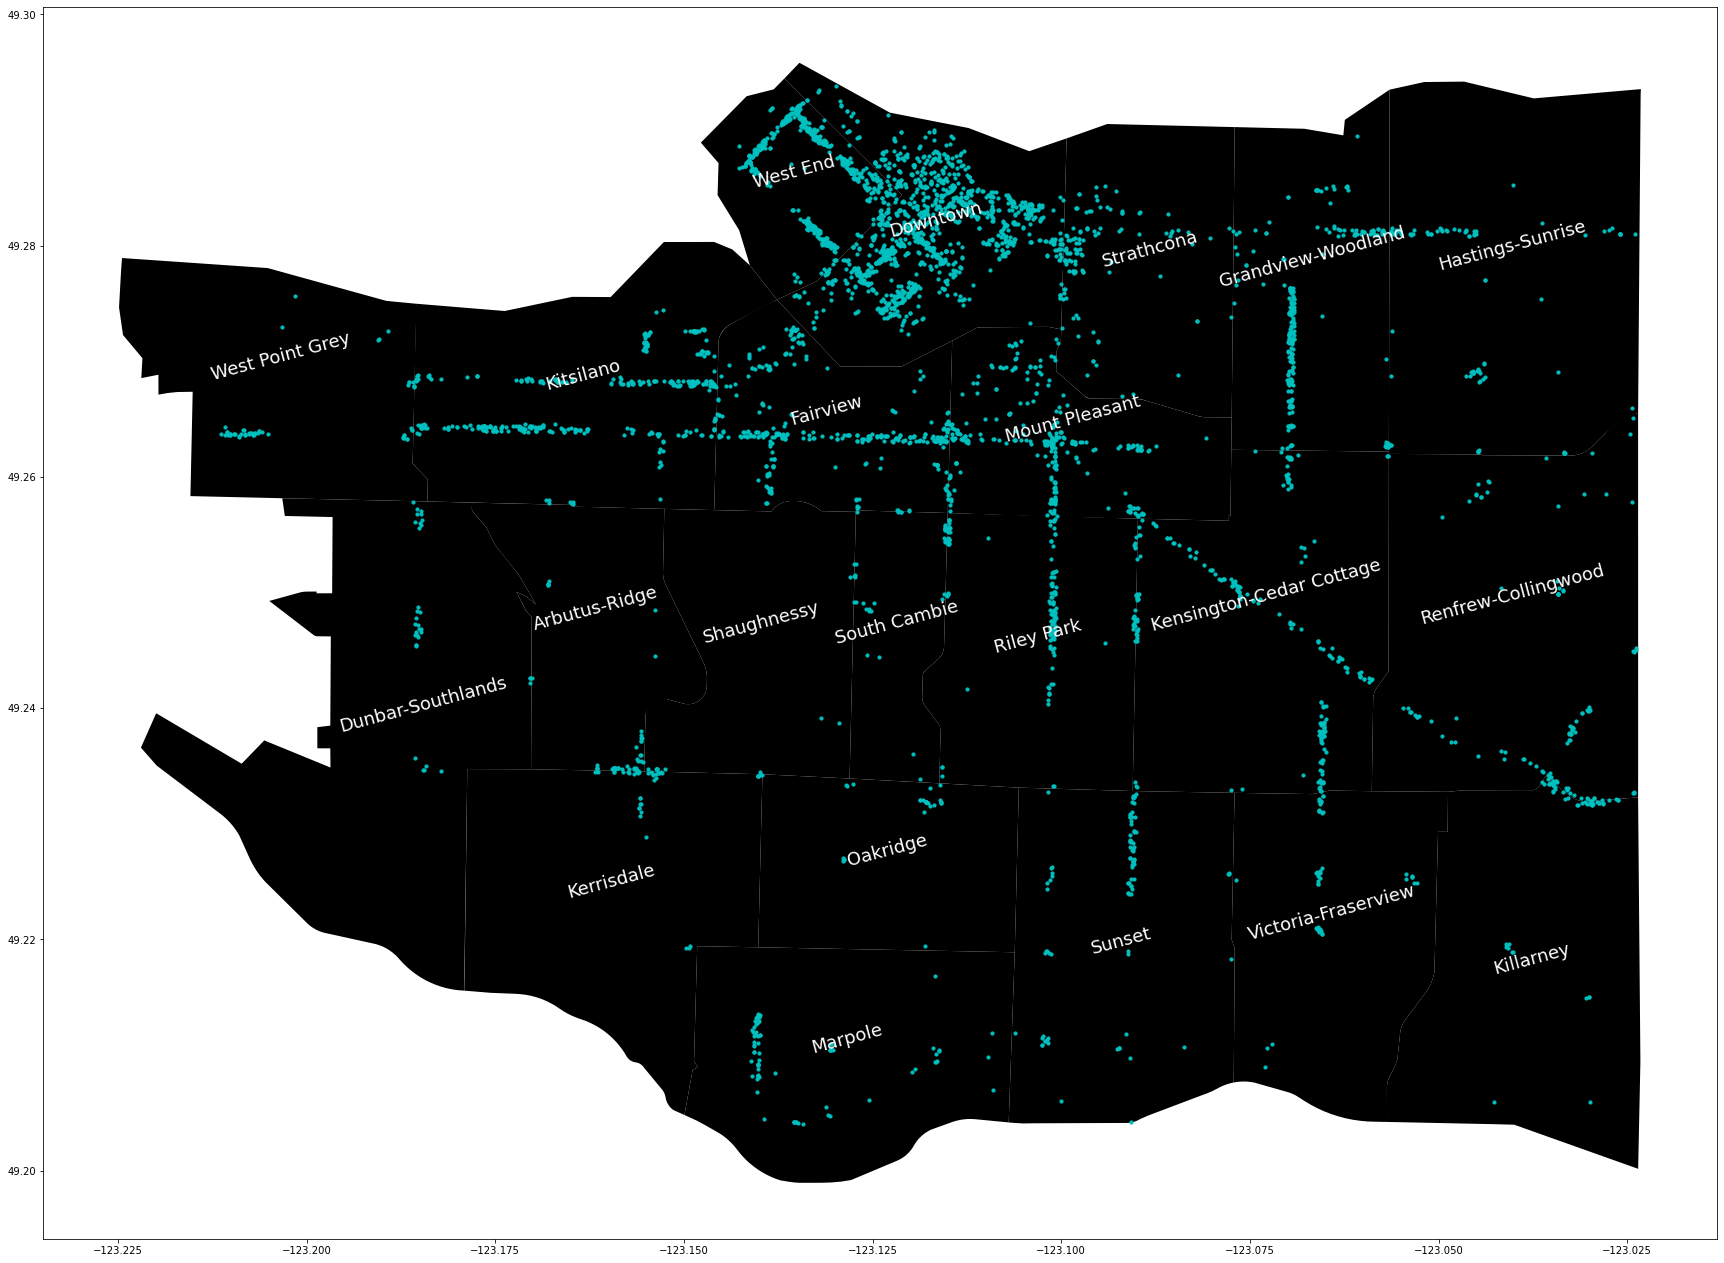

In [23]:
fig,ax = plt.subplots(figsize=(30,30))
vancouvermap.plot(ax=ax, color='black');


# Annotating neighborhood labels to polygons 
for row in vancouvermap.iterrows():
    geo = row[1]['geometry'].centroid
    geo_len = row[1]['geometry'].length
    if row[1]['name'] == 'Dunbar-Southlands':
        ax.annotate(text=row[1]['name'], xy=[geo.x+0.005, geo.y], color="white",ha='center', fontsize=18,
    #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                   rotation=15)

    else:
        ax.annotate(text=row[1]['name'], xy=[geo.x, geo.y], color="white",ha='center', fontsize=18,
    #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                   rotation=15)
    # show the subplot
    ax.figure
    

# busstops.plot(ax=ax, color='red',marker='x',markersize=1);    
# rt_stations.plot(ax=ax, color = 'red', markersize = 50, marker='s' )
cmap = plt.cm.tab20
vanrestaurants[(vanrestaurants['clusters']!=-1)].plot(ax=ax,markersize=10,color='c');
# vanrestaurants[vanrestaurants['clusters']==-1].plot(ax=ax,markersize=2,color='white',marker='x');
# vanbusinesses[(vanbusinesses['clusters']!=-1)].plot(ax=ax,markersize=2,column='clusters',cmap = cmap);
# vanbusinesses[(vanbusinesses['clusters']==-1)].plot(ax=ax,markersize=2,color='white',marker='x');
plt.savefig('Images/van resto plot.svg')

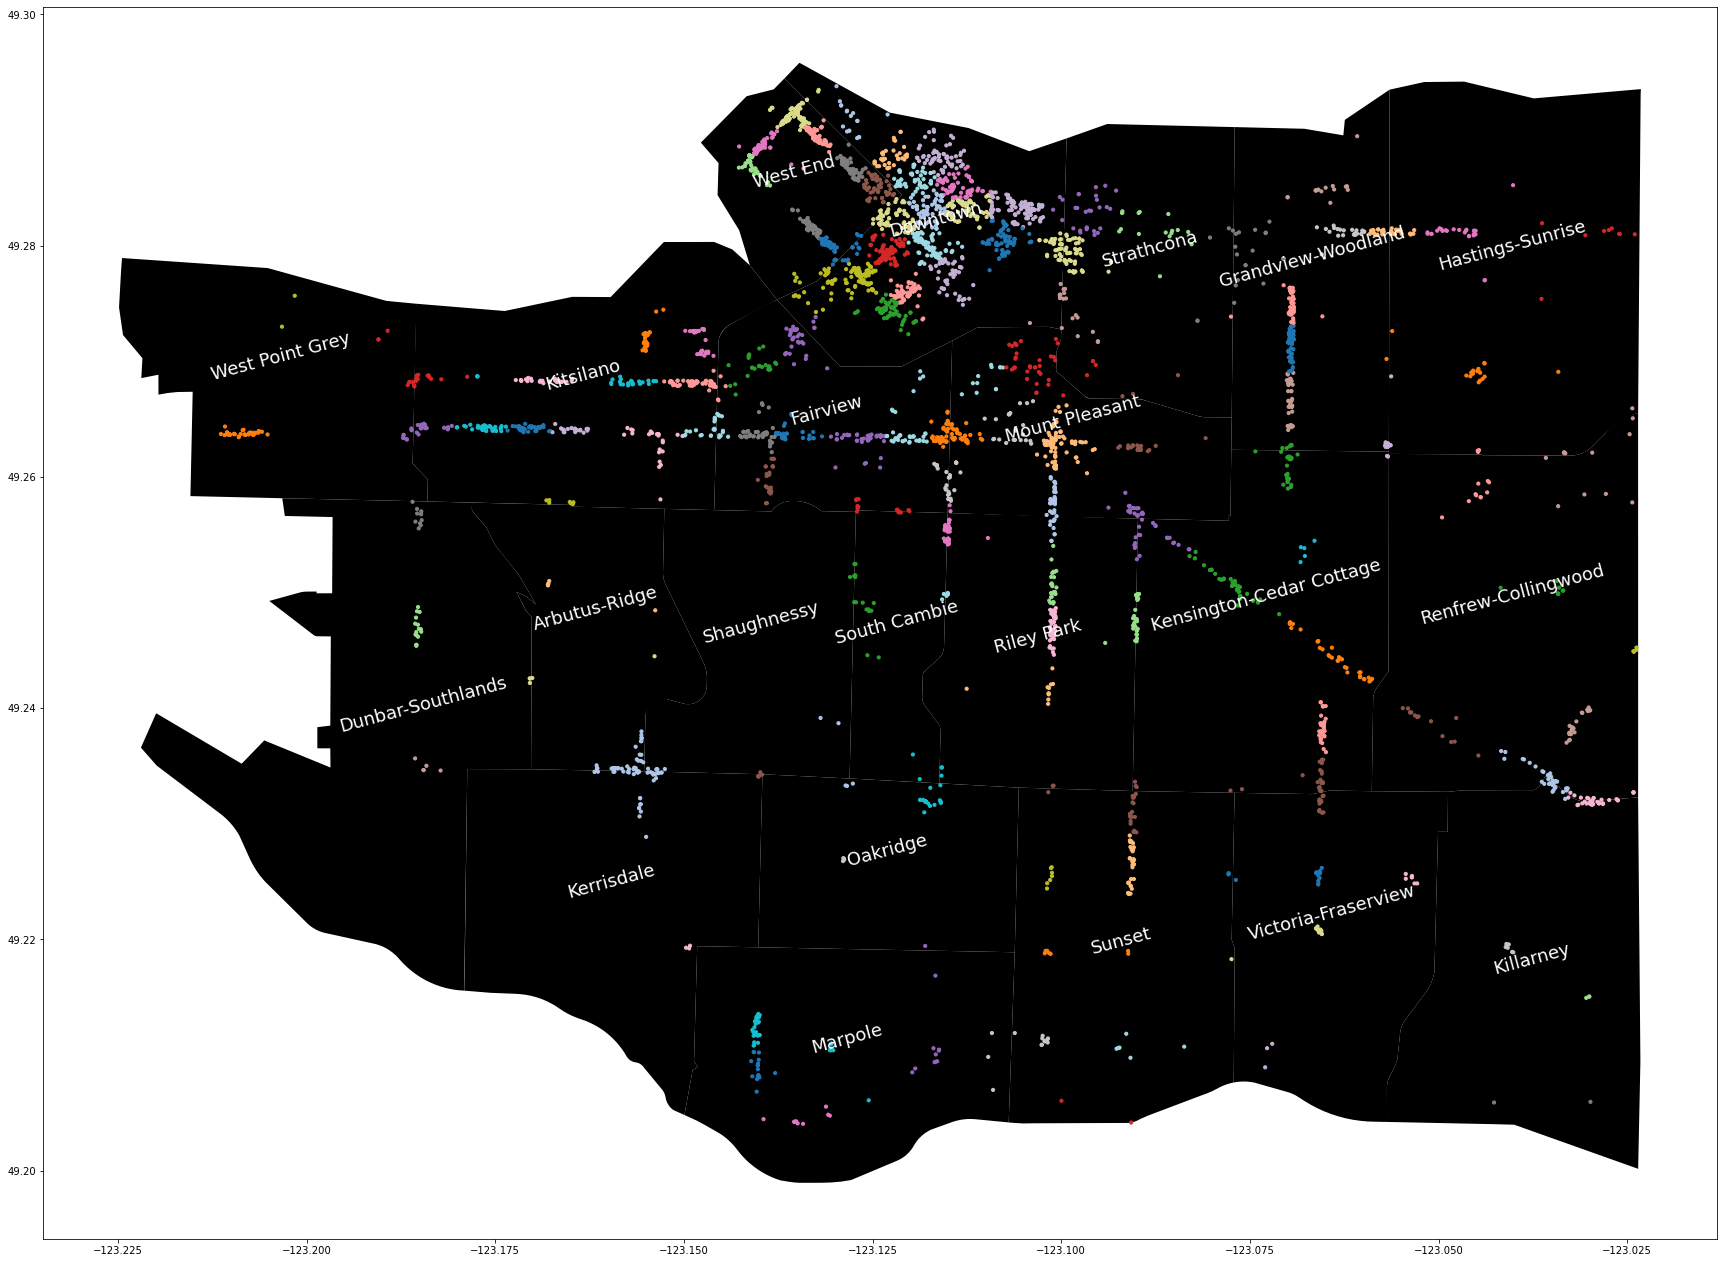

In [24]:
fig,ax = plt.subplots(figsize=(30,30))
vancouvermap.plot(ax=ax, color='black');


# Annotating neighborhood labels to polygons 
for row in vancouvermap.iterrows():
    geo = row[1]['geometry'].centroid
    geo_len = row[1]['geometry'].length
    if row[1]['name'] == 'Dunbar-Southlands':
        ax.annotate(text=row[1]['name'], xy=[geo.x+0.005, geo.y], color="white",ha='center', fontsize=18,
    #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                   rotation=15)

    else:
        ax.annotate(text=row[1]['name'], xy=[geo.x, geo.y], color="white",ha='center', fontsize=18,
    #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                   rotation=15)
    # show the subplot
    ax.figure
    

# busstops.plot(ax=ax, color='red',marker='x',markersize=1);    
# rt_stations.plot(ax=ax, color = 'red', markersize = 50, marker='s' )
cmap = plt.cm.tab20
vanrestaurants[(vanrestaurants['clusters']!=-1)].plot(ax=ax,markersize=10,column='clusters',cmap = cmap);

plt.savefig('Images/van resto with nbh clusters.svg')

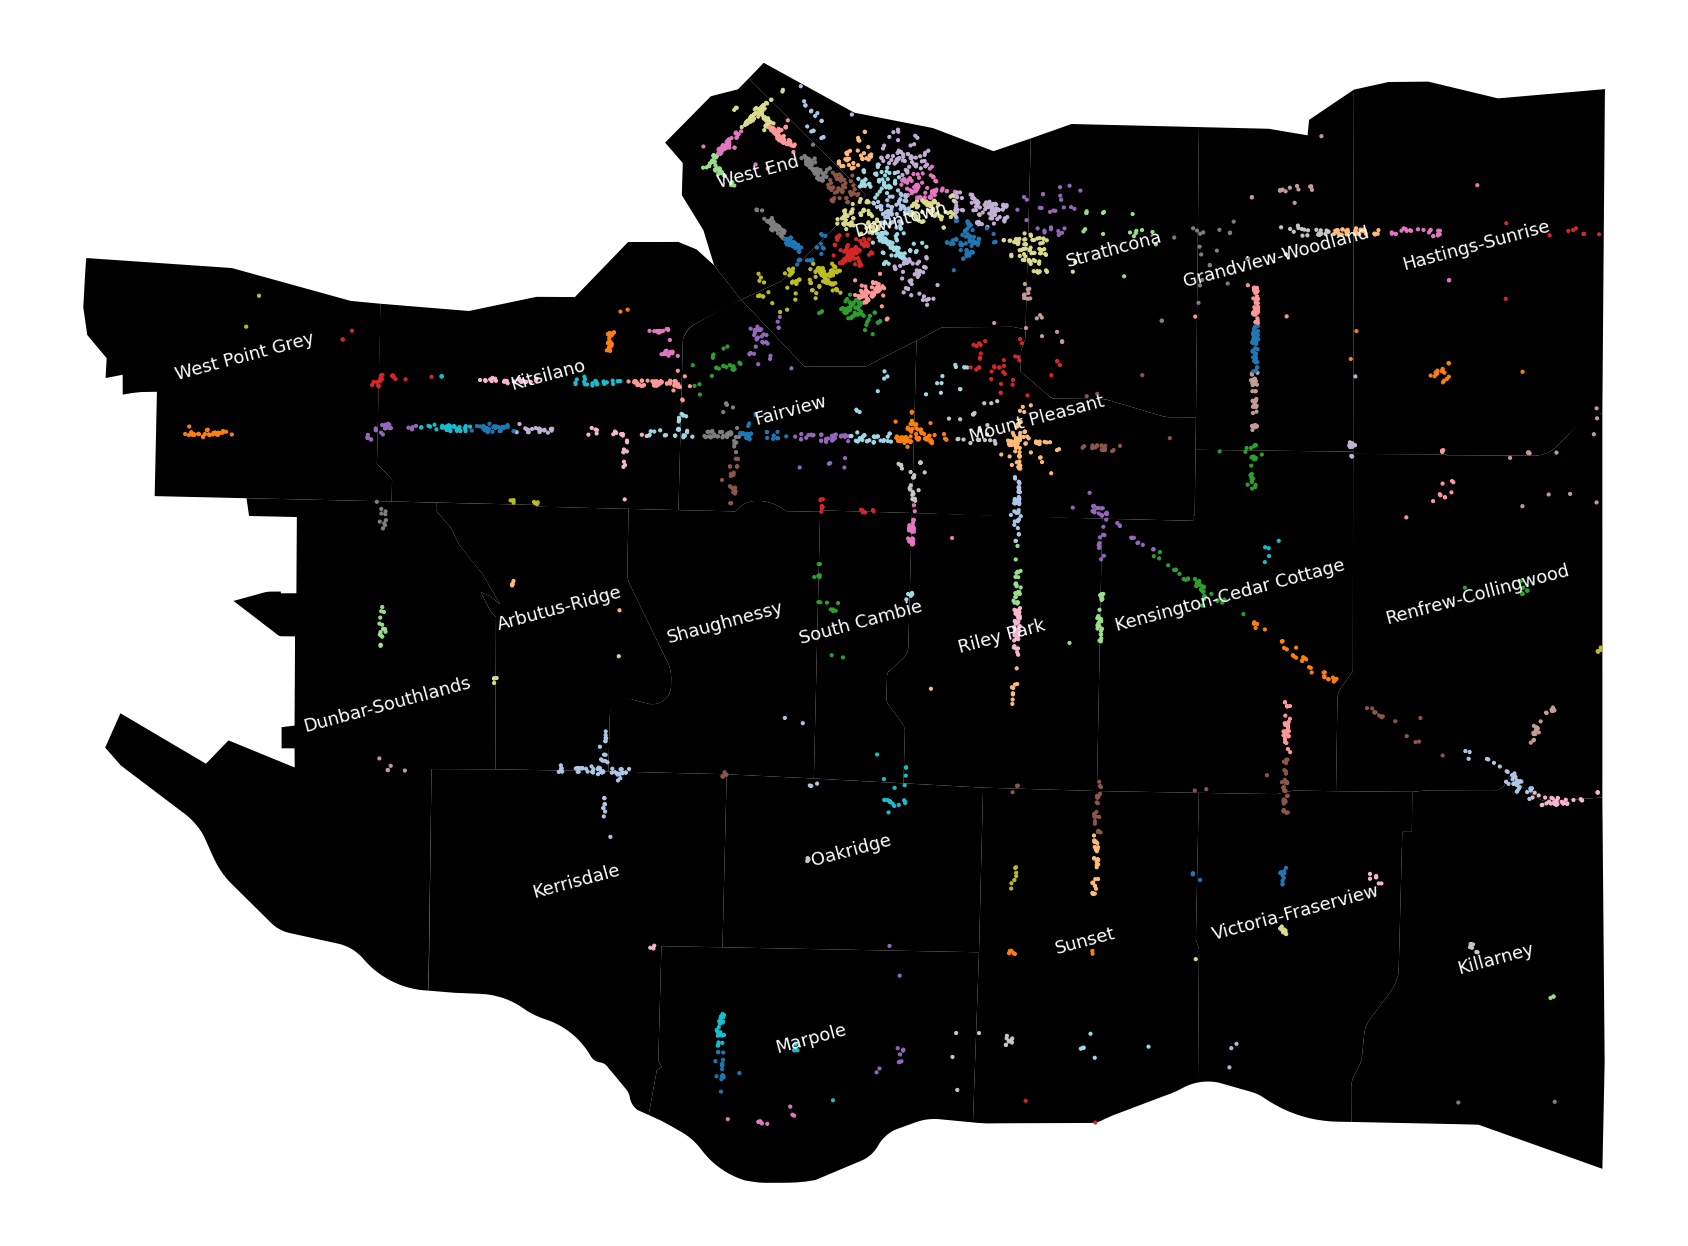

In [87]:
fig,ax = plt.subplots(figsize=(30,30))
vancouvermap.plot(ax=ax, color='black');

# Annotating neighborhood labels to polygons 
for row in vancouvermap.iterrows():
    geo = row[1]['geometry'].centroid
    geo_len = row[1]['geometry'].length
    if row[1]['name'] == 'Dunbar-Southlands':
        ax.annotate(text=row[1]['name'], xy=[geo.x+0.005, geo.y], color="white",ha='center', fontsize=18,
    #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                   rotation=15)

    else:
        ax.annotate(text=row[1]['name'], xy=[geo.x, geo.y], color="white",ha='center', fontsize=18,
    #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                   rotation=15)
    # show the subplot
    ax.figure

vanrestaurants[(vanrestaurants['clusters']!=-1)].plot(ax=ax,markersize=10,column='clusters',cmap = cmap);
plt.axis('off')
plt.savefig('Images/van resto with nbh clusters.png')

[0 1 2 3 4 5 6]


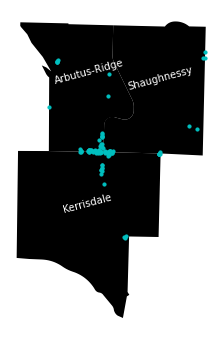

In [84]:
neighborhood = ['Kerrisdale','Arbutus-Ridge','Shaughnessy']
fig,ax = plt.subplots(figsize=(6,6))
vancouvermap[vancouvermap['name'].isin(neighborhood)].plot(ax=ax, color='black');

cmap = plt.cm.Pastel1
# cmap = cmap.set_bad(color='white')

van_nbh = vanrestaurants[(vanrestaurants['neighborhood'].isin(neighborhood))].copy()

# Annotating neighborhood labels to polygons 
for row in vancouvermap.iterrows():
    geo = row[1]['geometry'].centroid
    geo_len = row[1]['geometry'].length
    if row[1]['name'] in neighborhood:
        if row[1]['name'] == 'Dunbar-Southlands':
            ax.annotate(text=row[1]['name'], xy=[geo.x+0.005, geo.y], color="white",ha='center', fontsize=10,
        #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                       rotation=15)
        elif row[1]['name'] == 'Arbutus-Ridge':
            ax.annotate(text=row[1]['name'], xy=[geo.x+0.0025, geo.y], color="white",ha='center', fontsize=10,
        #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                       rotation=15)
        else:
            ax.annotate(text=row[1]['name'], xy=[geo.x, geo.y], color="white",ha='center', fontsize=10,
        #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                       rotation=15)
        # show the subplot
        ax.figure

for i, cluster in enumerate(van_nbh[(van_nbh['clusters']!=-1)]['clusters'].unique()):
    van_nbh.loc[van_nbh['clusters'] == cluster,'clusters'] = i

cmap = plt.cm.tab20
# van_nbh[(van_nbh['clusters']==-1)].plot(ax=ax,markersize=10,color='w')    
van_nbh[(van_nbh['clusters']!=-1)].plot(ax=ax,markersize=10,color='c');
print(van_nbh['clusters'].unique())
plt.axis('off')
plt.savefig('Images/clusters broken up.png')

[ 0  1  6  3  4  5  7  8  9 10 11 12]


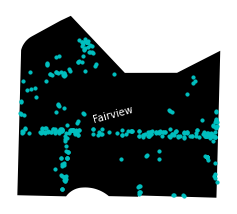

In [83]:
neighborhood = ['Fairview']
fig,ax = plt.subplots(figsize=(4,4))
vancouvermap[vancouvermap['name'].isin(neighborhood)].plot(ax=ax, color='black');

van_nbh = vanrestaurants[(vanrestaurants['neighborhood'].isin(neighborhood))].copy()

# Annotating neighborhood labels to polygons 
for row in vancouvermap.iterrows():
    geo = row[1]['geometry'].centroid
    geo_len = row[1]['geometry'].length
    if row[1]['name'] in neighborhood:
        if row[1]['name'] == 'Dunbar-Southlands':
            ax.annotate(text=row[1]['name'], xy=[geo.x+0.005, geo.y], color="white",ha='center', fontsize=10,
        #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                       rotation=15)
        elif row[1]['name'] == 'Arbutus-Ridge':
            ax.annotate(text=row[1]['name'], xy=[geo.x+0.0025, geo.y], color="white",ha='center', fontsize=10,
        #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                       rotation=15)
        else:
            ax.annotate(text=row[1]['name'], xy=[geo.x, geo.y], color="white",ha='center', fontsize=10,
        #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                       rotation=15)
        # show the subplot
        ax.figure

for i, cluster in enumerate(van_nbh[(van_nbh['clusters']!=-1)]['clusters'].unique()):
    van_nbh.loc[van_nbh['clusters'] == cluster,'clusters'] = i

cmap = plt.cm.tab20
# van_nbh[(van_nbh['clusters']==-1)].plot(ax=ax,markersize=10,color='w')    
van_nbh[(van_nbh['clusters']!=-1)].plot(ax=ax,markersize=10,color='c');
print(van_nbh['clusters'].unique())
plt.axis('off')
plt.savefig('Images/cluster too wide.png')

In [26]:
vanrestaurants[vanrestaurants['categories'].str.contains('Hong Kong Style Cafe')]

business_id                                 name  \
4771  9DhkvgR9X8R94PvKsLGb8A                       Happy Day Cafe   
5162  CAldpZIKFgHurOXyaKOZCw                         Van Tea Cafe   
7399  wwihvgPkuP4WnqexYNwigg  Ming Tak Hong Kong Style Restaurant   

                address       city state postal_code   latitude   longitude  \
4771      3312 Kingsway  VANCOUVER    BC     V5R 5K7  49.234346 -123.035214   
5162   5688 Main Street  VANCOUVER    BC     V5W 2S7  49.233291 -123.101017   
7399  8363 Granville St  VANCOUVER    BC     V6P 4Z8  49.210833 -123.140705   

      stars  review_count  is_open  \
4771    3.0           100        1   
5162    4.0            41        1   
7399    3.0            21        1   

                                             attributes  \
4771  {'BikeParking': 'True', 'GoodForKids': 'True',...   
5162  {'RestaurantsDelivery': 'False', 'Alcohol': ''...   
7399  {'RestaurantsGoodForGroups': 'True', 'HasTV': ...   

                                             categories  \
4771  Cafes; Breakfast & Brunch; Restaurants; Chines...   
5162  Seafood; Cafes; Restaurants; Hong Kong Style Cafe   
7399         Hong Kong Style Cafe; Chinese; Restaurants   

                                                  hours  \
4771  {'Monday': '7:30-23:0', 'Tuesday': '7:30-23:0'...   
5162  {'Monday': '9:0-23:0', 'Tuesday': '9:0-23:0', ...   
7399  {'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...   

                         geometry         neighborhood  bayes_stars  clusters  
4771  POINT (-123.03521 49.23435)  Renfrew-Collingwood     3.024836         8  
5162  POINT (-123.10102 49.23329)           Riley Park     3.947995        66  
7399  POINT (-123.14070 49.21083)              Marpole     3.100299       111

# Generate Features for each Cluster of Restaurants

In [27]:
# Stack restaurants by single category
vanrestos_sc = vanrestaurants.merge(stacked_categories,on='business_id',how='left',validate='1:m')

# restrict to subcategories
vanrestos_sc = vanrestos_sc[~vanrestos_sc['single category'].isin(yelp_categories)]

vanrestos_sc.head()

business_id                         name  \
1  D4JtQNTI4X3KcbzacDJsMw          Bob Likes Thai Food   
3  jfDfHzAq6iKkRnzzZ4n1nQ  Let's Roll Custom Sushi Bar   
4  jfDfHzAq6iKkRnzzZ4n1nQ  Let's Roll Custom Sushi Bar   
5  jfDfHzAq6iKkRnzzZ4n1nQ  Let's Roll Custom Sushi Bar   
7  OfA_4cHgvlknHMcn0qNs2w               Little Caesars   

                         address       city state postal_code   latitude  \
1                   3755 Main St  VANCOUVER    BC         V5V  49.251342   
3  1184 Denman Street, Suite 104  VANCOUVER    BC     V6G 2M9  49.286360   
4  1184 Denman Street, Suite 104  VANCOUVER    BC     V6G 2M9  49.286360   
5  1184 Denman Street, Suite 104  VANCOUVER    BC     V6G 2M9  49.286360   
7               7010 Kerr Street  VANCOUVER    BC         V5S  49.219532   

    longitude  stars  review_count  is_open  \
1 -123.101333    3.5           169        1   
3 -123.140261    4.5            31        0   
4 -123.140261    4.5            31        0   
5 -123.140261    4.5            31        0   
7 -123.040893    1.0             9        1   

                                          attributes  \
1  {'GoodForKids': 'True', 'Alcohol': 'u'none'', ...   
3  {'RestaurantsAttire': 'u'casual'', 'HasTV': 'F...   
4  {'RestaurantsAttire': 'u'casual'', 'HasTV': 'F...   
5  {'RestaurantsAttire': 'u'casual'', 'HasTV': 'F...   
7  {'GoodForKids': 'True', 'RestaurantsReservatio...   

                                          categories  \
1                                  Restaurants; Thai   
3  Restaurants; Canadian (New); Sushi Bars; Ameri...   
4  Restaurants; Canadian (New); Sushi Bars; Ameri...   
5  Restaurants; Canadian (New); Sushi Bars; Ameri...   
7                                 Restaurants; Pizza   

                                               hours  \
1  {'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...   
3  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
4  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
5  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
7  {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...   

                      geometry neighborhood  bayes_stars  clusters  \
1  POINT (-123.10133 49.25134)   Riley Park     3.500619        31   
3  POINT (-123.14026 49.28636)     West End     4.364105        32   
4  POINT (-123.14026 49.28636)     West End     4.364105        32   
5  POINT (-123.14026 49.28636)     West End     4.364105        32   
7  POINT (-123.04089 49.21953)    Killarney     1.900556        93   

  single category  
1            Thai  
3  Canadian (New)  
4      Sushi Bars  
5  American (New)  
7           Pizza

In [28]:
# Count of number of restaurants by business ids and cluster
num_nbh_restos = vanrestos_sc.groupby(['clusters']).agg({'business_id':'nunique'}).reset_index()
num_nbh_restos.rename(columns={'business_id':'business_count'},inplace=True)
print(num_nbh_restos.sort_values(by='business_count',ascending=False).head(5))
print(num_nbh_restos.sort_values(by='business_count',ascending=False).tail(5))

# Count of number of restaurant categories in city
num_restos_city = vanrestos_sc.groupby('single category').agg({'business_id':'nunique','bayes_stars':'mean'})
num_restos_city.rename(columns={'business_id':'total_category_count','bayes_stars':'mean_bayes_stars'},inplace=True)
num_restos_city =num_restos_city.reset_index()
print("Total number of restaurant categories in city",len(num_restos_city))
print(num_restos_city.sort_values(by='total_category_count').tail())
num_restos_city.sort_values(by='total_category_count').head()

     clusters  business_count
107       107             111
60         60             110
37         37             102
118       118              89
24         24              88
    clusters  business_count
33        33               3
58        58               3
38        38               2
99        99               2
87        87               2
Total number of restaurant categories in city 332
    single category  total_category_count  mean_bayes_stars
258      Sandwiches                   415          3.579340
74          Chinese                   419          3.380645
80     Coffee & Tea                   477          3.644892
27             Bars                   492          3.548443
184        Japanese                   516          3.538729


single category  total_category_count  mean_bayes_stars
165  Horseback Riding                     1          3.504146
186           Jewelry                     1          3.186270
192           Laotian                     1          4.123676
78             Cinema                     1          2.579809
77           Cideries                     1          4.255389

In [29]:
# Aggregate by cluster
nbh_restos = vanrestos_sc.groupby(['clusters','single category',]).agg(
            {'business_id':'nunique','bayes_stars':'mean'}
            ).reset_index()

# Count of restaurant categories by cluster
nbh_restos.rename(columns={'business_id':'category_count','clusters':'nbh_clusters'},inplace=True)

# Merge category count for city
nbh_restos = nbh_restos.merge(num_restos_city,on='single category',how='left',validate='m:1')

# Merge business count by neighborhood
nbh_restos = nbh_restos.merge(num_nbh_restos,left_on='nbh_clusters',right_on='clusters',how='left',validate='m:1')

# Generate total business count in city
nbh_restos['total_business_count'] = num_nbh_restos['business_count'].sum()

# Restrict to clusters that are bigger than 6
# nbh_restos = nbh_restos[nbh_restos['business_count']>=6] # 12 clusters dropped

# Calculate incidence ratio
nbh_restos['incidence ratio'] = (nbh_restos['category_count'] / nbh_restos['total_category_count']) \
                                * (nbh_restos['total_business_count'] / nbh_restos['business_count'])

# Remove rare categories that produce unreasonably high incidence ratios
# nbh_restos = nbh_restos[~((nbh_restos['incidence ratio']>=50)&(nbh_restos['total_category_count']<12))]

# Calculate Category Adjustment Factor based on ratio above mean_bayes_stars for each category
# and adjust category_count based on that factor
nbh_restos['category adj'] = nbh_restos['bayes_stars'] / nbh_restos['mean_bayes_stars']
nbh_restos['adj_category_count'] = nbh_restos['category_count'] * nbh_restos['category adj']

nbh_restos.sort_values(by=['nbh_clusters'],ascending=False).head(10)

nbh_clusters single category  category_count  bayes_stars  \
5214           122      Vietnamese               1     4.296158   
5186           122         Dim Sum               1     3.951179   
5193           122         Hot Pot               1     3.030323   
5192           122        Hot Dogs               1     4.150556   
5191           122         Grocery               1     3.502200   
5190           122           Greek               1     4.380678   
5189           122     Gluten-Free               2     3.453358   
5188           122     Food Stands               1     4.150556   
5187           122          Diners               1     3.063604   
5185           122        Desserts               1     4.228210   

      total_category_count  mean_bayes_stars  clusters  business_count  \
5214                   215          3.599865       122              28   
5186                    78          3.365875       122              28   
5193                    25          3.431880       122              28   
5192                    28          3.585044       122              28   
5191                    73          3.650508       122              28   
5190                    64          3.539761       122              28   
5189                    95          3.762711       122              28   
5188                    45          3.813388       122              28   
5187                    76          3.494954       122              28   
5185                   167          3.762789       122              28   

      total_business_count  incidence ratio  category adj  adj_category_count  
5214                  4171         0.692857      1.193422            1.193422  
5186                  4171         1.909799      1.173894            1.173894  
5193                  4171         5.958571      0.882992            0.882992  
5192                  4171         5.320153      1.157742            1.157742  
5191                  4171         2.040607      0.959373            0.959373  
5190                  4171         2.327567      1.237563            1.237563  
5189                  4171         3.136090      0.917785            1.835569  
5188                  4171         3.310317      1.088417            1.088417  
5187                  4171         1.960056      0.876579            0.876579  
5185                  4171         0.892002      1.123690            1.123690

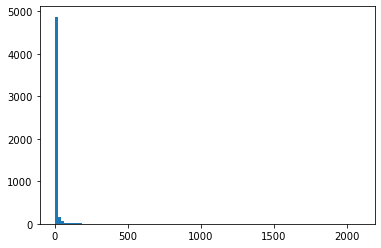

In [30]:
plt.hist(nbh_restos['incidence ratio'],bins=100);

# Reshape dataset wide for topic modeling

In [31]:
vars_for_reshape = ['nbh_clusters','business_count','single category','adj_category_count']
index_cols = ['nbh_clusters','business_count']
col_var = 'single category'

# Reshaped dataset
nbh_restos_wide = nbh_restos[vars_for_reshape].pivot(index=index_cols, columns=col_var).reset_index()

# Fill NAs with 0 counts
nbh_restos_wide = nbh_restos_wide.fillna(0)

# Rename columns and revert to single index columns
new_cols= []
for col in nbh_restos_wide.columns:
    if col[0] == 'adj_category_count':
        new_cols += [col[1]]
    else:
        new_cols += [col[0]+col[1]]
nbh_restos_wide.columns = new_cols
nbh_restos_wide = nbh_restos_wide.reindex(nbh_restos_wide.columns,axis=1)

# Generate list of restaurant categories
resto_cats = list(nbh_restos_wide.columns)
resto_cats.remove('nbh_clusters')
resto_cats.remove('business_count')

nbh_restos_wide.head()

nbh_clusters  business_count  Acai Bowls  Accessories  Acupuncture  \
0             0              80         0.0          0.0          0.0   
1             1              15         0.0          0.0          0.0   
2             2              33         0.0          0.0          0.0   
3             3              58         0.0          0.0          0.0   
4             4              20         0.0          0.0          0.0   

   Adult Education  Adult Entertainment    Afghan  African  American (New)  \
0              0.0                  0.0  0.000000      0.0        0.858107   
1              0.0                  0.0  0.000000      0.0        0.000000   
2              0.0                  0.0  0.000000      0.0        0.874719   
3              0.0                  0.0  0.913788      0.0        1.762670   
4              0.0                  0.0  0.000000      0.0        0.805834   

   ...  Walking Tours  Wedding Planning  Weight Loss Centers  Whiskey Bars  \
0  ...            0.0               0.0                  0.0      0.974416   
1  ...            0.0               0.0                  0.0      0.000000   
2  ...            0.0               0.0                  0.0      1.107191   
3  ...            0.0               0.0                  0.0      0.972816   
4  ...            0.0               0.0                  0.0      0.000000   

   Wine Bars  Wine Tasting Room  Wineries  Women's Clothing  Wraps  Yoga  
0   1.995328                0.0       0.0               0.0    0.0   0.0  
1   0.000000                0.0       0.0               0.0    0.0   0.0  
2   0.000000                0.0       0.0               0.0    0.0   0.0  
3   1.991071                0.0       0.0               0.0    0.0   0.0  
4   0.000000                0.0       0.0               0.0    0.0   0.0  

[5 rows x 334 columns]

In [32]:
from sklearn.decomposition import NMF
# fit the transfomed content with NMF

n_topics = 4
nmf = NMF(n_components=n_topics,max_iter=1000)

# Count vectorized
nmf.fit(nbh_restos_wide[resto_cats])

NMF(max_iter=1000, n_components=4)

In [33]:
# display the result
from collections import defaultdict

top_cats_dict = {}
top_weights_dict = {}
top_cats_count = defaultdict(int)
for index,topic in enumerate(nmf.components_):
    n = 6
    print(f"The top {n-1} words for topic # {index}")
    top_categories = [resto_cats[i].replace(' word','') for i in topic.argsort()[:-1*n:-1]]
    top_weights = [topic[i] for i in topic.argsort()[:-1*n:-1]]
    print(top_categories)
    print("\n")
    top_cats_dict[index] = top_categories
    top_weights_dict[index] = top_weights
    for cat in top_categories:
        top_cats_count[cat]+=1

The top 5 words for topic # 0
['Bars', 'Canadian (New)', 'Sandwiches', 'American (New)', 'Seafood']


The top 5 words for topic # 1
['Chinese', 'Vietnamese', 'Seafood', 'Dim Sum', 'Sandwiches']


The top 5 words for topic # 2
['Japanese', 'Korean', 'Noodles', 'Ramen', 'Asian Fusion']


The top 5 words for topic # 3
['Coffee & Tea', 'Cafes', 'Breakfast & Brunch', 'Pizza', 'Sandwiches']




In [34]:
all_topic_keys = pd.DataFrame()
topic_names = ['Bars/Western','Chinese/Vietnamese','Japanese/Korean','Casual/Cafe']
for topic_i,topic_name in enumerate(topic_names):
    topic_keys = pd.DataFrame(top_weights_dict[topic_i],columns=['Weight'])
    topic_keys['category'] = pd.Series(top_cats_dict[topic_i])
    cat_counts = nbh_restos[nbh_restos['single category'].isin(top_cats_dict[topic_i])].groupby('single category').mean()['category_count'].reset_index()
    topic_keys = topic_keys.merge(cat_counts,left_on='category',right_on='single category',how='left',validate='1:1').drop(columns=['single category'])
    topic_keys['Topic'] = topic_i
    topic_keys['Topic Name'] = topic_name
    all_topic_keys = all_topic_keys.append(topic_keys)
all_topic_keys

Weight            category  category_count  Topic          Topic Name
0  6.550577                Bars        5.788235      0        Bars/Western
1  3.805513      Canadian (New)        4.291139      0        Bars/Western
2  2.447229          Sandwiches        4.278351      0        Bars/Western
3  2.431032      American (New)        2.950000      0        Bars/Western
4  2.043190             Seafood        2.756098      0        Bars/Western
0  6.409713             Chinese        4.319588      1  Chinese/Vietnamese
1  2.276774          Vietnamese        2.621951      1  Chinese/Vietnamese
2  1.348135             Seafood        2.756098      1  Chinese/Vietnamese
3  1.259177             Dim Sum        1.625000      1  Chinese/Vietnamese
4  1.075558          Sandwiches        4.278351      1  Chinese/Vietnamese
0  6.362364            Japanese        4.822430      2     Japanese/Korean
1  1.894537              Korean        2.463415      2     Japanese/Korean
2  1.482044             Noodles        2.125000      2     Japanese/Korean
3  1.436343               Ramen        1.870968      2     Japanese/Korean
4  1.344831        Asian Fusion        2.402778      2     Japanese/Korean
0  3.100331        Coffee & Tea        4.376147      3         Casual/Cafe
1  2.922743               Cafes        4.177083      3         Casual/Cafe
2  2.801415  Breakfast & Brunch        3.930693      3         Casual/Cafe
3  2.132096               Pizza        3.197917      3         Casual/Cafe
4  2.058993          Sandwiches        4.278351      3         Casual/Cafe

<ipython-input-35-183dbc0a2aac>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.Topic==i, 'category'], rotation=30, horizontalalignment= 'right')
<ipython-input-35-183dbc0a2aac>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.Topic==i, 'category'], rotation=30, horizontalalignment= 'right')
<ipython-input-35-183dbc0a2aac>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.Topic==i, 'category'], rotation=30, horizontalalignment= 'right')
<ipython-input-35-183dbc0a2aac>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.Topic==i, 'category'], rotation=30, horizontalalignment= 'right')


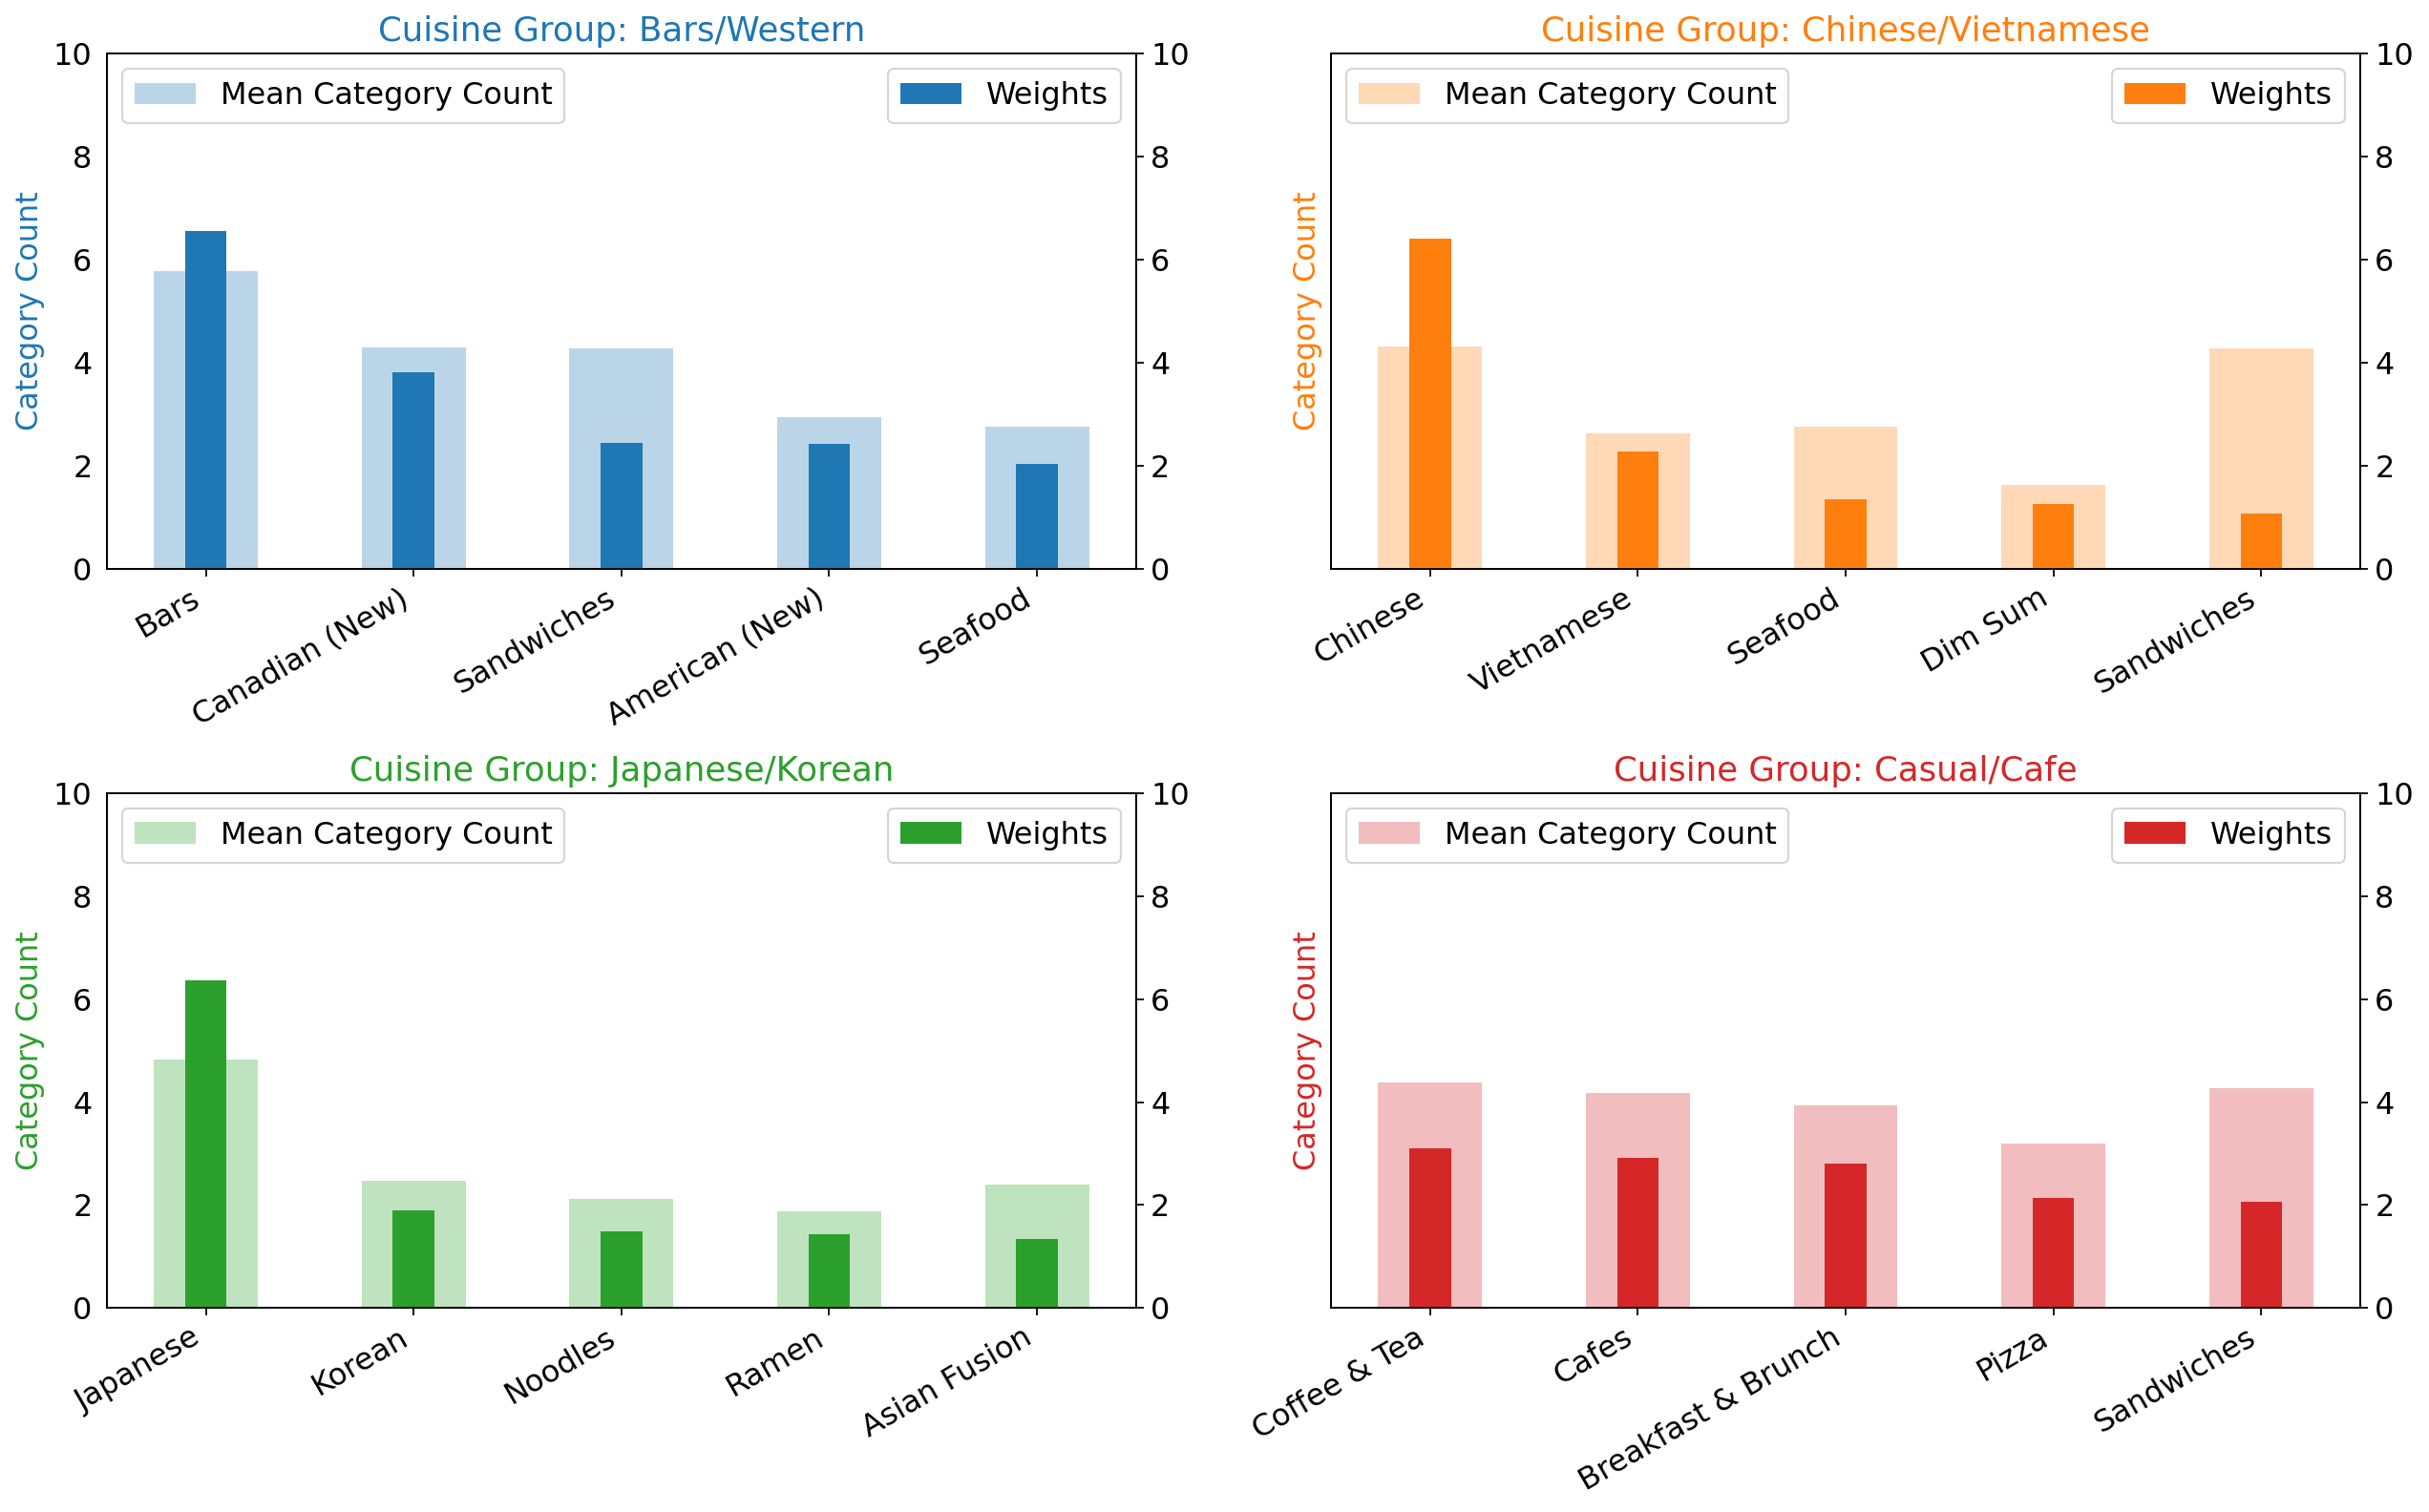

In [35]:
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import matplotlib.pylab as pylab

params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
          
pylab.rcParams.update(params)

df = all_topic_keys

fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='category', height="category_count", data=df.loc[df.Topic==i, :], color=cols[i], width=0.5, alpha=0.3, label='Mean Category Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='category', height="Weight", data=df.loc[df.Topic==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Category Count', color=cols[i])
    ax_twin.set_ylim(0, 10); ax.set_ylim(0, 10)
    
    topic_name = topic_names[i]
    
    ax.set_title('Cuisine Group: ' + topic_name, color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.Topic==i, 'category'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left',fontsize='x-large'); ax_twin.legend(loc='upper right',fontsize='x-large')

# fig.axes.get_yaxis().set_visible(False)
fig.tight_layout(w_pad=2);    
# fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show();
fig.savefig('Images/Restaurant Group Top Categories.svg');

In [36]:
dir(fig)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_xlabel_grp',
 '_align_ylabel_grp',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_constrained',
 '_constrained_layout_pads',
 '_contains',
 '_default_contains',
 '_dpi',
 '_gci',
 '_get_clipping_extent_bbox',
 '_get_dpi',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_layoutbox',
 '_make_key',
 '_mouseover',
 '_normalize_grid_string',
 '_oid',
 '_path_effects',
 '_picker',
 '_process_projection_requirements',
 '_propobservers',
 '_rasterized',
 '_remove_method',
 '_repr_html_',
 '

In [37]:
nbh_restos_topic = pd.DataFrame(nmf.transform(nbh_restos_wide[resto_cats]),columns=topic_names)
nbh_restos_topic = nbh_restos_wide[['nbh_clusters','business_count',]].join(nbh_restos_topic)
nbh_restos_topic

nbh_clusters  business_count  Bars/Western  Chinese/Vietnamese  \
0               0              80      0.953914            0.614487   
1               1              15      0.000000            0.380121   
2               2              33      0.048702            0.219505   
3               3              58      1.232534            0.000000   
4               4              20      0.020508            0.565056   
..            ...             ...           ...                 ...   
118           118              89      1.657258            0.100504   
119           119              35      0.131333            0.685300   
120           120              15      0.397556            0.000000   
121           121               7      0.000000            0.360552   
122           122              28      0.262941            0.575603   

     Japanese/Korean  Casual/Cafe  
0           0.846072     2.728853  
1           0.262925     0.288959  
2           0.630588     0.902823  
3           0.167605     1.483100  
4           0.015374     0.545709  
..               ...          ...  
118         1.932549     1.497524  
119         0.542160     0.763809  
120         0.267100     0.216444  
121         0.132370     0.000000  
122         0.305579     0.035080  

[123 rows x 6 columns]

# Cluster neighborhood clusters into restaurant groups

In [38]:
X_resto_cats = nbh_restos_topic.drop(columns=['nbh_clusters','business_count'])
X_resto_cats = StandardScaler().fit_transform(X_resto_cats)
print(X_resto_cats.shape)

(123, 4)


<IPython.core.display.Javascript object>

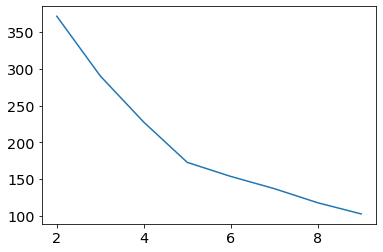

In [39]:
sil_resto = []
inertia = []
myrange_resto = np.arange(2,10,1)
for k in myrange_resto:
    kmeans_resto_test = KMeans(n_clusters = k,random_state=42).fit(X_resto_cats)
    labels_resto_test = kmeans_resto_test.labels_
    sil_resto.append(silhouette_score(X_resto_cats, labels_resto_test, metric = 'euclidean'))
    inertia.append(kmeans_resto_test.inertia_)
    
# print(f"Highest Silhouette Score at {myrange_resto[np.argmax(sil_resto)]}")
plt.plot(myrange_resto,inertia);

In [40]:
# Clustering with k == 5
kmeans_resto= KMeans(n_clusters=5,random_state=42).fit(X_resto_cats)

# add cluster labels
nbh_restos_topic['resto_clusters'] = kmeans_resto.labels_

cols = ['resto_clusters','nbh_clusters','business_count'] + topic_names
nbh_restos_topic = nbh_restos_topic[cols]
nbh_restos_topic['resto_clusters'] = nbh_restos_topic['resto_clusters'].replace([0,1,2,3,4],[1,4,2,0,3])+1

nbh_restos_topic.groupby('resto_clusters').mean()[topic_names]

Bars/Western  Chinese/Vietnamese  Japanese/Korean  Casual/Cafe
resto_clusters                                                                
1                   2.451328            0.316596         0.580128     0.600878
2                   0.157875            2.063774         0.407365     0.570796
3                   0.830802            0.428045         2.881478     0.938049
4                   0.604622            0.333582         0.394403     1.707727
5                   0.186821            0.290870         0.215820     0.384002

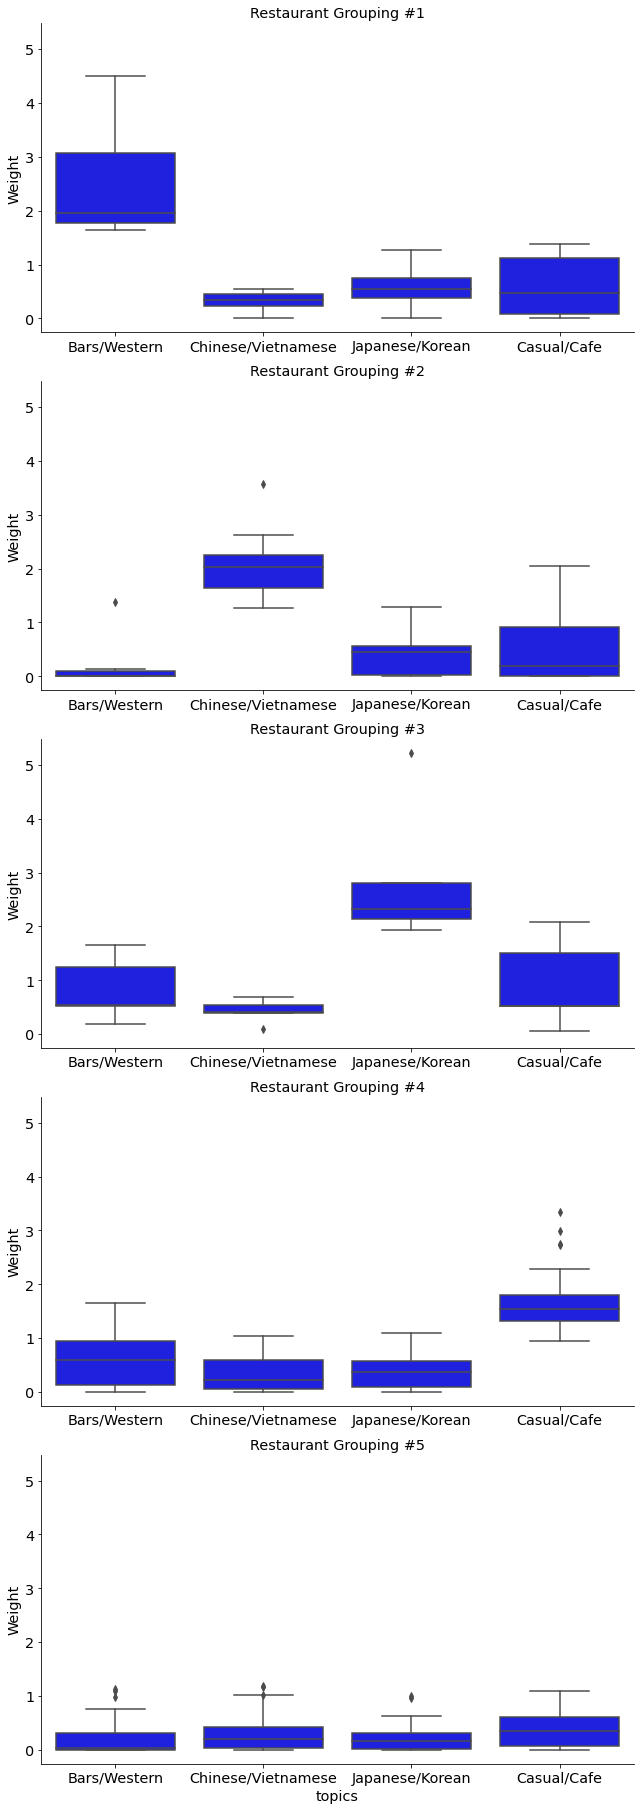

In [41]:
# Plot boxplots of topic weights by cluster and topic

nbh_restos_melt = nbh_restos_topic.melt(id_vars=['nbh_clusters','resto_clusters','business_count'],value_vars=topic_names,var_name ='topics',value_name='topic weights')
# nbh_restos_melt['resto_clusters'] += 1
nbh_restos_melt.rename(columns={'topic weights':'Weight','resto_clusters':'Restaurant Grouping'},inplace=True)

catplot = sns.catplot(data = nbh_restos_melt, x='topics',y='Weight',row='Restaurant Grouping', kind='box',
                      sharex=False,sharey=True, color='blue',
                     height=5, aspect=1.75)
catplot.set_titles("{row_var} #{row_name}")

plt.savefig('Images/Topic Weights by Restaurant Group Cluster.svg',bbox_inches='tight')

In [42]:
# Prepare data for plotting

van_resto_clusters = nbh_restos_topic.merge(vanrestaurants,left_on='nbh_clusters',right_on='clusters',how='right',validate="1:m")
van_resto_clusters.drop(columns='clusters',inplace=True)

van_resto_clusters = gpd.GeoDataFrame(van_resto_clusters,
                          crs=vancouvermap.crs,
                          geometry=van_resto_clusters['geometry'])
van_resto_clusters.head()

resto_clusters  nbh_clusters  business_count  Bars/Western  \
0               5            31              28      0.630550   
1               1            32              47      1.730463   
2               5            93               7      0.012539   
3               2            13              34      0.107866   
4               4            11              67      1.127176   

   Chinese/Vietnamese  Japanese/Korean  Casual/Cafe             business_id  \
0            0.755751         0.427800     0.000000  D4JtQNTI4X3KcbzacDJsMw   
1            0.216988         0.361216     0.158753  jfDfHzAq6iKkRnzzZ4n1nQ   
2            0.194837         0.129664     0.030694  OfA_4cHgvlknHMcn0qNs2w   
3            1.519486         0.000000     0.853465  7ee6XyKyeduI-Rbc6L5j2Q   
4            0.586200         0.764317     1.286645  r-hWf-bd9im5rj_l2MeofQ   

                          name                        address  ...  \
0          Bob Likes Thai Food                   3755 Main St  ...   
1  Let's Roll Custom Sushi Bar  1184 Denman Street, Suite 104  ...   
2               Little Caesars               7010 Kerr Street  ...   
3            NingTu Restaurant                  2130 Kingsway  ...   
4              Take Five CafÃ©       102-609 Granville Street  ...   

    longitude stars review_count  is_open  \
0 -123.101333   3.5          169        1   
1 -123.140261   4.5           31        0   
2 -123.040893   1.0            9        1   
3 -123.063337   4.0           60        0   
4 -123.117107   4.0           17        1   

                                          attributes  \
0  {'GoodForKids': 'True', 'Alcohol': 'u'none'', ...   
1  {'RestaurantsAttire': 'u'casual'', 'HasTV': 'F...   
2  {'GoodForKids': 'True', 'RestaurantsReservatio...   
3  {'RestaurantsGoodForGroups': 'True', 'NoiseLev...   
4  {'BikeParking': 'True', 'WiFi': ''free'', 'Res...   

                                          categories  \
0                                  Restaurants; Thai   
1  Restaurants; Canadian (New); Sushi Bars; Ameri...   
2                                 Restaurants; Pizza   
3                               Restaurants; Chinese   
4             Food; Coffee & Tea; Restaurants; Cafes   

                                               hours  \
0  {'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...   
1  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
2  {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...   
3  {'Monday': '17:30-21:30', 'Tuesday': '17:30-21...   
4                                               None   

                      geometry              neighborhood bayes_stars  
0  POINT (-123.10133 49.25134)                Riley Park    3.500619  
1  POINT (-123.14026 49.28636)                  West End    4.364105  
2  POINT (-123.04089 49.21953)                 Killarney    1.900556  
3  POINT (-123.06334 49.24408)  Kensington-Cedar Cottage    3.963197  
4  POINT (-123.11711 49.28353)                  Downtown    3.891263  

[5 rows x 24 columns]

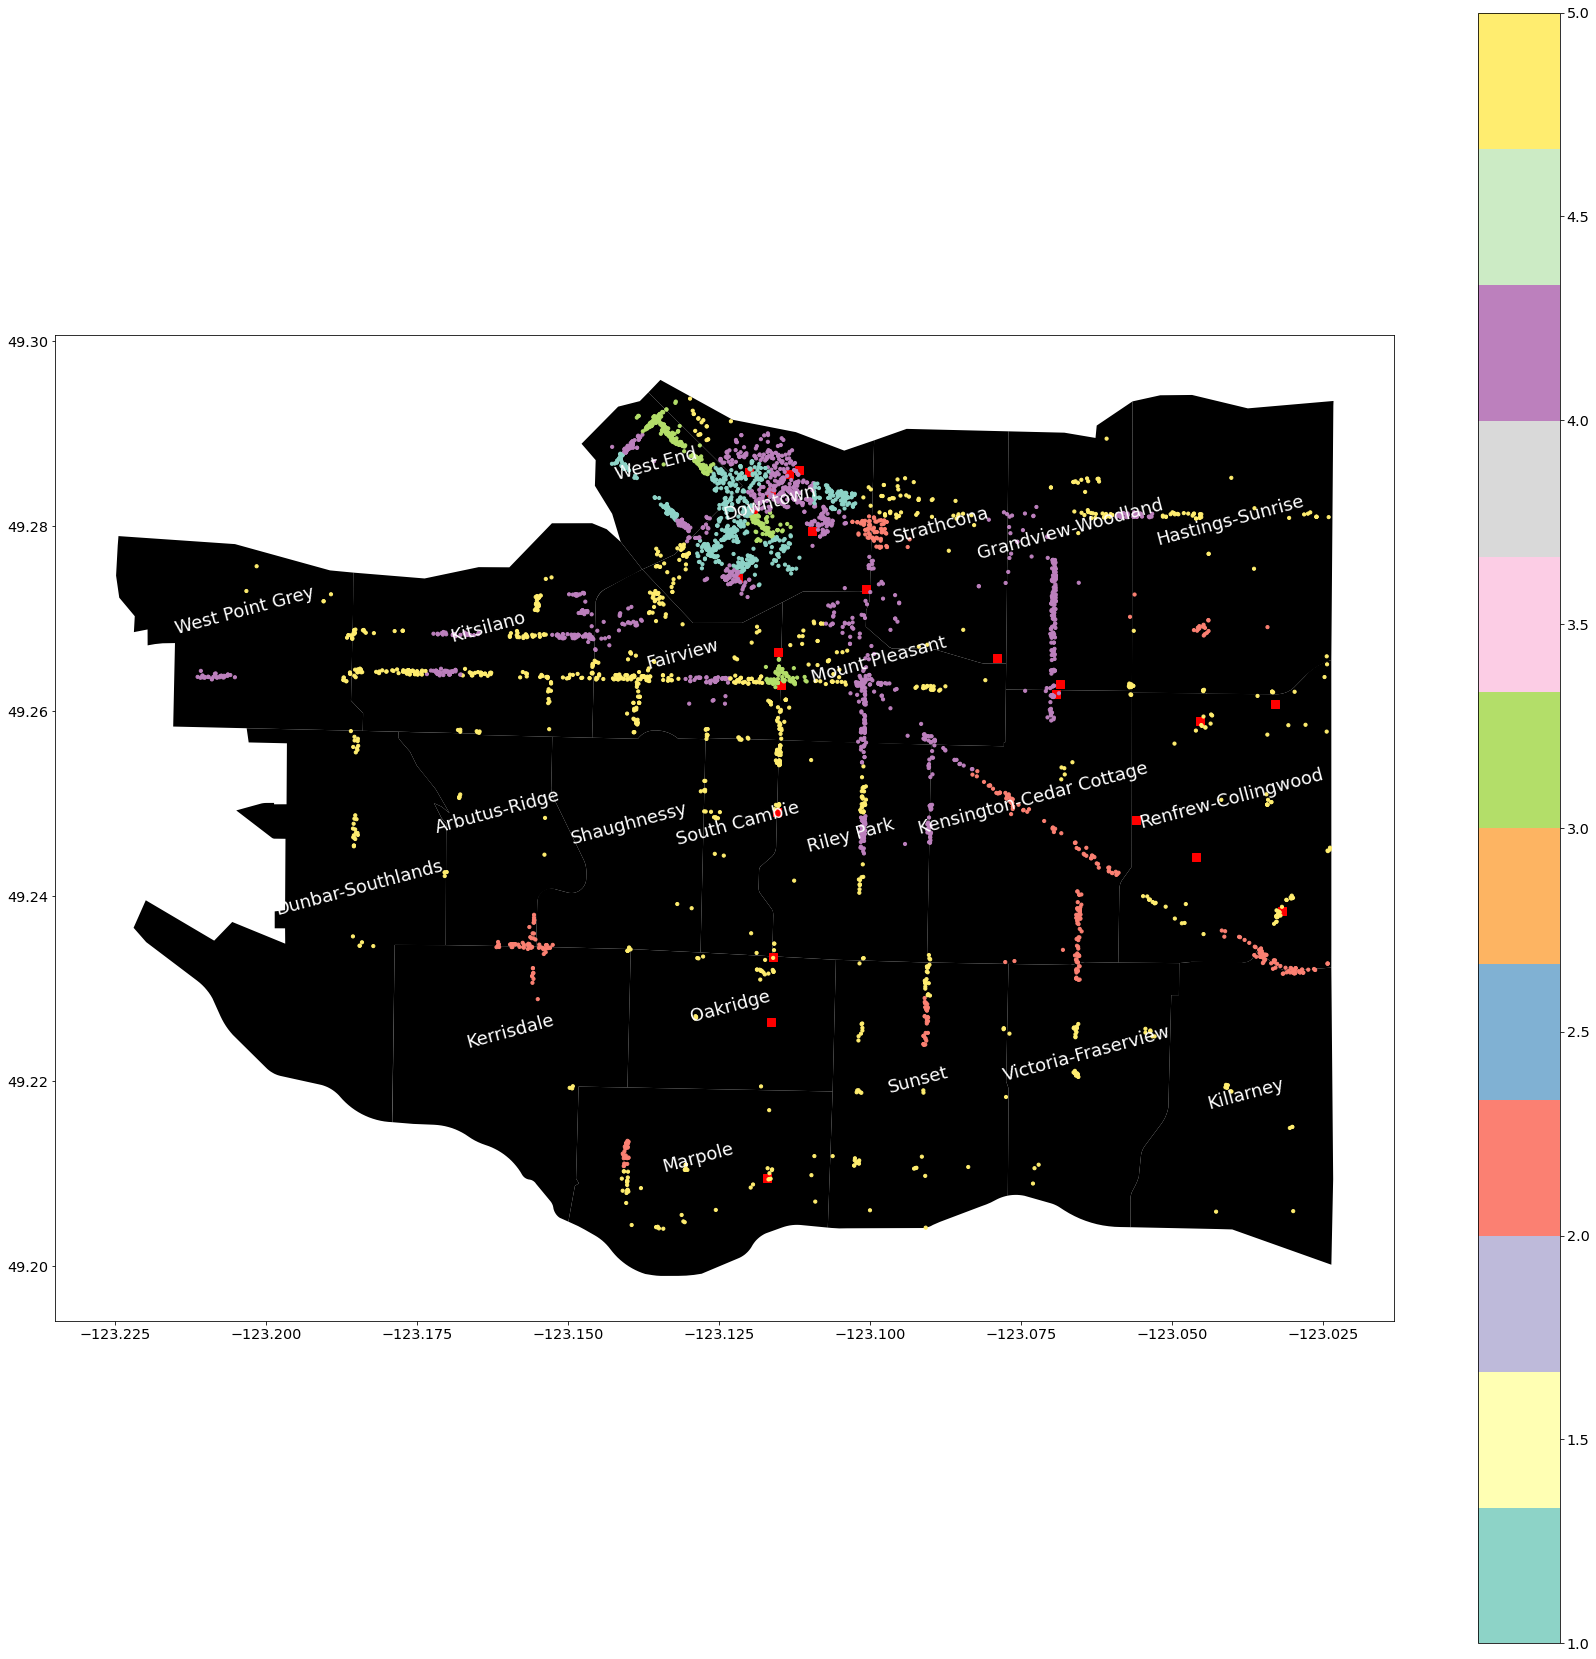

In [43]:
fig,ax = plt.subplots(figsize=(30,30))
vancouvermap.plot(ax=ax, color='black');

# Annotating neighborhood labels to polygons 
for row in vancouvermap.iterrows():
    geo = row[1]['geometry'].centroid
    geo_len = row[1]['geometry'].length
    if row[1]['name'] == 'Dunbar-Southlands':
        ax.annotate(text=row[1]['name'], xy=[geo.x+0.005, geo.y], color="white",ha='center', fontsize=18,
    #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                   rotation=15)

    else:
        ax.annotate(text=row[1]['name'], xy=[geo.x, geo.y], color="white",ha='center', fontsize=18,
    #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                   rotation=15)
    # show the subplot
    ax.figure
    

# busstops.plot(ax=ax, color='red',marker='x',markersize=1);    
rt_stations.plot(ax=ax, color = 'red', markersize = 50, marker='s' )

cmap = plt.cm.Set3
van_resto_clusters.plot(ax=ax,markersize=10,column='resto_clusters',cmap = cmap,legend=True);

# Bokeh

In [44]:
from bokeh.plotting import figure, show, save
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper, CategoricalColorMapper
from bokeh.io import output_notebook
from bokeh.palettes import viridis, d3, Spectral5, brewer
from bokeh.transform import factor_cmap

def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""

    # Parse the exterior of the coordinate
    exterior = row[geom].exterior

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [45]:
output_notebook()

Loading BokehJS ...

In [46]:
vanmap_bokeh = gpd.GeoDataFrame()
vanmap_bokeh['x'] = vancouvermap.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
vanmap_bokeh['y'] = vancouvermap.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)
vanmap_bokeh = ColumnDataSource(vanmap_bokeh)

In [47]:
cluster_labels = van_resto_clusters['resto_clusters'] # see clustering cell above

palette = brewer['Set3'][5]
color_map = {i: palette[i] for i in range(5)}
colors = [color_map[x-1] for x in cluster_labels]

vanrest_bokeh = van_resto_clusters.drop(columns=['geometry']).sort_values(by='resto_clusters')
vanrest_bokeh = vanrest_bokeh.join(pd.Series(colors,name='colors'))

vanrest_bokeh = ColumnDataSource(vanrest_bokeh) 

p = figure(title="Vancouver Restaurants, Colored by Restaurant Grouping Clusters",plot_width=1000, plot_height=800)
p.patches('x','y',source=vanmap_bokeh,line_width=2,fill_color='black',line_color='white')

p.circle(x='longitude',y='latitude',
         legend_field="resto_clusters",
         source=vanrest_bokeh,
         color='colors',
        )

show(p)

# Appendix

## Sample neighborhood clusters for presentation

In [48]:
vars_for_reshape = ['nbh_clusters','business_count','single category','category_count']
index_cols = ['nbh_clusters','business_count']
col_var = 'single category'

# Reshaped dataset
nbh_restos_wide_nonadj = nbh_restos[vars_for_reshape].pivot(index=index_cols, columns=col_var).reset_index()

# Fill NAs with 0 counts
nbh_restos_wide_nonadj = nbh_restos_wide_nonadj.fillna(0)

# Rename columns and revert to single index columns
new_cols= []
for col in nbh_restos_wide_nonadj.columns:
    if col[0] == 'category_count':
        new_cols += [col[1]]
    else:
        new_cols += [col[0]+col[1]]
nbh_restos_wide_nonadj.columns = new_cols
nbh_restos_wide_nonadj = nbh_restos_wide_nonadj.reindex(nbh_restos_wide_nonadj.columns,axis=1)

# Generate list of restaurant categories
resto_cats = list(nbh_restos_wide.columns)
resto_cats.remove('nbh_clusters')
resto_cats.remove('business_count')

sample_nbhs= nbh_restos_wide_nonadj[nbh_restos_wide_nonadj['nbh_clusters'].isin([45,47,91])]
sample_nbhs = sample_nbhs.melt(id_vars= ['nbh_clusters','business_count'], value_vars = resto_cats)
sample_nbh = sample_nbhs.sort_values(by=['nbh_clusters','value'],ascending=[True,False]).groupby('nbh_clusters').head(5)
sample_nbh.pivot(index=index_cols, columns = 'variable').fillna(0).sort_values(by=[('value','Korean'),('value','Japanese')],ascending=False)

value                                \
variable                    Asian Fusion Bars Breakfast & Brunch Cafes   
nbh_clusters business_count                                              
45           67                      8.0  6.0                0.0   0.0   
91           75                      0.0  9.0                7.0   0.0   
47           47                      0.0  0.0                6.0   4.0   

                                                                         \
variable                    Canadian (New) Chinese Coffee & Tea Italian   
nbh_clusters business_count                                               
45           67                        0.0     6.0          0.0     0.0   
91           75                       12.0     0.0          9.0     0.0   
47           47                        0.0     0.0          0.0     6.0   

                                                              
variable                    Japanese Korean Pizza Vegetarian  
nbh_clusters business_count                                   
45           67                 16.0   20.0   0.0        0.0  
91           75                 17.0    0.0   0.0        0.0  
47           47                  0.0    0.0   6.0        6.0

In [49]:
columns_to_show  = ['resto_clusters','nbh_clusters','business_count','Bars/Western','Chinese/Vietnamese','Japanese/Korean','Casual/Cafe']
sample_resto_clust = van_resto_clusters[(van_resto_clusters['nbh_clusters'].isin([45,47,91,18]))]
sample_resto_clust.drop_duplicates(subset=['resto_clusters','nbh_clusters'],keep='first').sort_values(by='Japanese/Korean', ascending=False)[columns_to_show]

resto_clusters  nbh_clusters  business_count  Bars/Western  \
55                3            45              67      0.532013   
14                3            91              75      1.250779   
9                 3            18              79      0.195384   
134               4            47              47      0.000229   

     Chinese/Vietnamese  Japanese/Korean  Casual/Cafe  
55             0.696635         2.807409     0.066264  
14             0.544196         2.313638     0.524497  
9              0.390344         2.136060     2.082516  
134            0.133646         0.363245     1.787820

In [50]:
# random japanese district contained within fairview/mount pleasant

nbh_18 = van_resto_clusters[(van_resto_clusters['nbh_clusters'].isin([18]))].copy()
nbh_18['has Japanese'] = 0
nbh_18.loc[nbh_18['categories'].str.contains('Japanese'),'has Japanese'] = 1

nbh_18.sort_values(by=['has Japanese','bayes_stars'],ascending = False)[['name','bayes_stars','categories']].head(3)

name  bayes_stars  \
991            Saku     4.463491   
2115      Uma Sushi     4.450079   
326   Marulilu Cafe     3.991237   

                                             categories  
991                               Japanese; Restaurants  
2115                            Japanese; ; Restaurants  
326   Sandwiches; Food; Cafes; Coffee & Tea; Breakfa...

In [51]:
van_resto_clusters[van_resto_clusters['name'].str.contains("Dinesty")]

resto_clusters  nbh_clusters  business_count  Bars/Western  \
409               3           107             111      0.518578   

     Chinese/Vietnamese  Japanese/Korean  Casual/Cafe             business_id  \
409            0.408545         5.217735     0.519445  JgSGpSMHbGecAXs_o1rE_g   

                       name             address  ...   longitude stars  \
409  Dinesty Dumpling House  1719 Robson Street  ... -123.134391   4.0   

    review_count  is_open                                         attributes  \
409          782        1  {'RestaurantsTakeOut': 'True', 'BusinessParkin...   

                                            categories  \
409  Chinese; Restaurants; Dumplings; Bubble Tea; Food   

                                                 hours  \
409  {'Monday': '17:0-20:30', 'Tuesday': '17:0-20:3...   

                        geometry neighborhood bayes_stars  
409  POINT (-123.13439 49.29082)     West End     3.99696  

[1 rows x 24 columns]

In [52]:
nbh_restos[nbh_restos['nbh_clusters'] == 18].sort_values(by='category_count',ascending=False)

nbh_clusters      single category  category_count  bayes_stars  \
839            18             Japanese              18     3.548181   
817            18         Coffee & Tea              13     3.777236   
827            18            Fast Food               8     2.995321   
809            18              Burgers               8     3.137679   
815            18              Chinese               6     3.379598   
..            ...                  ...             ...          ...   
823            18              Doctors               1     3.501925   
850            18            Pan Asian               1     3.501476   
822            18  Do-It-Yourself Food               1     3.200599   
833            18                Greek               1     3.502994   
797            18          Acupuncture               1     3.501925   

     total_category_count  mean_bayes_stars  clusters  business_count  \
839                   516          3.538729        18              79   
817                   477          3.644892        18              79   
827                   286          3.194732        18              79   
809                   222          3.320527        18              79   
815                   419          3.380645        18              79   
..                    ...               ...       ...             ...   
823                     1          3.501925        18              79   
850                     4          3.494564        18              79   
822                     9          4.182866        18              79   
833                    64          3.539761        18              79   
797                     2          3.502821        18              79   

     total_business_count  incidence ratio  category adj  adj_category_count  
839                  4171         1.841772      1.002671           18.048077  
817                  4171         1.438925      1.036309           13.472021  
827                  4171         1.476852      0.937581            7.500650  
809                  4171         1.902611      0.944934            7.559474  
815                  4171         0.756050      0.999690            5.998142  
..                    ...              ...           ...                 ...  
823                  4171        52.797468      1.000000            1.000000  
850                  4171        13.199367      1.001978            1.001978  
822                  4171         5.866385      0.765169            0.765169  
833                  4171         0.824960      0.989613            0.989613  
797                  4171        26.398734      0.999744            0.999744  

[76 rows x 12 columns]

# Deprecated code

## Clustering by counts

In [53]:
X_resto_cats_counts = nbh_restos_wide.drop(columns=['nbh_clusters','business_count'])
X_resto_cats_counts = StandardScaler().fit_transform(X_resto_cats_counts)
print(X_resto_cats_counts.shape)

(123, 332)


<IPython.core.display.Javascript object>

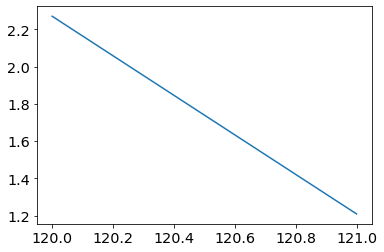

In [54]:
sil_resto = []
inertia = []
myrange_resto = np.arange(120,122,1)
for k in myrange_resto:
    kmeans_resto_test = KMeans(n_clusters = k,random_state=42).fit(X_resto_cats_counts)
    labels_resto_test = kmeans_resto_test.labels_
    sil_resto.append(silhouette_score(X_resto_cats_counts, labels_resto_test, metric = 'euclidean'))
    inertia.append(kmeans_resto_test.inertia_)
    
# print(f"Highest Silhouette Score at {myrange_resto[np.argmax(sil_resto)]}")
plt.plot(myrange_resto,inertia);

## Distribution of business and category counts

Number of clusters with less than 6 businesses: 12


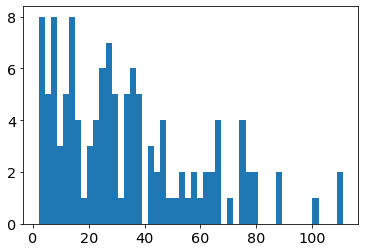

In [55]:
plt.hist(num_nbh_restos['business_count'],bins=50)
print("Number of clusters with less than 6 businesses:",
      len(num_nbh_restos[num_nbh_restos['business_count']<6]['clusters'].tolist()))

Number of categories that occur twice or less in the city: 137


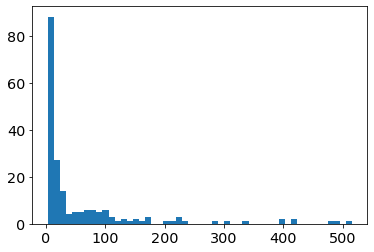

In [56]:
plt.hist(num_restos_city[num_restos_city['total_category_count']>2]['total_category_count'],bins=50)
print("Number of categories that occur twice or less in the city:", len(num_restos_city[num_restos_city['total_category_count']<=2]['single category'].tolist()))

# Create Incidence Ratio for All Businesses

In [57]:
vangeo_sc_df = vangeo_df.merge(stacked_categories,on='business_id',how='left',validate='1:m')

# Rearranging column order such that the last column (single category) is after categories
cols = vangeo_sc_df.columns.tolist()
after = cols.index('categories')+1
cols = cols[:after]+[cols[-1]] + cols[after:-1]
vangeo_sc_df = vangeo_sc_df[cols]

# restrict to subcategories
vangeo_sc_df = vangeo_sc_df[~vangeo_sc_df['single category'].isin(yelp_categories)]

print(vangeo_sc_df.shape)

# tag main categories
for category in yelp_categories:
    vangeo_sc_df[category] = 0
    vangeo_sc_df.loc[vangeo_sc_df['categories'].str.contains(category,na=False),category] = 1

print(vangeo_sc_df.columns)
mask0 = vangeo_sc_df['neighborhood'] == 'Arbutus-Ridge'
mask1 = vangeo_sc_df['single category'] == 'Accessories'
# mask0 = vangeo_sc_df['single category'] == 'Wineries'
vangeo_sc_df.loc[mask0 
                 & mask1                 
                 , :'neighborhood'].head()

(26464, 17)
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'single category', 'hours', 'geometry',
       'neighborhood', 'Active Life', 'Arts & Entertainment', 'Automotive',
       'Beauty & Spas', 'Education', 'Event Planning & Services',
       'Financial Services', 'Food', 'Health & Medical', 'Home Services',
       'Hotels & Travel', 'Local Flavor', 'Local Services', 'Mass Media',
       'Nightlife', 'Pets', 'Professional Services',
       'Public Services & Government', 'Real Estate',
       'Religious Organizations', 'Restaurants', 'Shopping'],
      dtype='object')


business_id                            name  \
11545  av18HuHSt9ZwnrWjVPnJKA                Isola Bella Kids   
13128  CEoLCwhZedkOhewHqsU95Q                             FAB   
32190  J66FaV_gnsZaU8AVavOveg  Buchan's Kerrisdale Stationery   

                  address       city state postal_code   latitude   longitude  \
11545     5692 Yew Street  VANCOUVER    BC     V6M 3Y3  49.234886 -123.157611   
13128  2305 W 41st Avenue  VANCOUVER    BC     V6M 2A3  49.234836 -123.159797   
32190  2141 41st Avenue W  VANCOUVER    BC     V6M 1Z6  49.234704 -123.156594   

       stars  review_count  is_open  \
11545    3.5             7        1   
13128    3.5             6        0   
32190    4.0             9        1   

                                              attributes  \
11545  {'BusinessParking': '{'garage': False, 'street...   
13128  {'RestaurantsPriceRange2': '3', 'BusinessParki...   
32190  {'BusinessParking': '{'garage': False, 'street...   

                                              categories single category  \
11545  Children's Clothing; Toy Stores; Fashion; Shoe...     Accessories   
13128   Women's Clothing; Accessories; Shopping; Fashion     Accessories   
32190  Flowers & Gifts; Arts & Crafts; Fashion; Event...     Accessories   

                                                   hours  \
11545  {'Monday': '0:0-0:0', 'Tuesday': '10:0-17:30',...   
13128                                               None   
32190  {'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...   

                          geometry   neighborhood  
11545  POINT (-123.15761 49.23489)  Arbutus-Ridge  
13128  POINT (-123.15980 49.23484)  Arbutus-Ridge  
32190  POINT (-123.15659 49.23470)  Arbutus-Ridge

In [58]:
# Count of number of business ids by neighborhood
num_nbh_biz = vangeo_sc_df.groupby(['neighborhood']).agg({'business_id':'nunique'}).reset_index()
num_nbh_biz.rename(columns={'business_id':'business_count'},inplace=True)
print(num_nbh_biz.head(5))

# Count of number of business categories in city
num_cat_city = vangeo_sc_df.groupby('single category').agg({'business_id':'nunique'})
num_cat_city.rename(columns={'business_id':'total_category_count'},inplace=True)
num_cat_city =num_cat_city.reset_index()
num_cat_city.head(5)

         neighborhood  business_count
0       Arbutus-Ridge             113
1            Downtown            2884
2   Dunbar-Southlands              87
3            Fairview            1023
4  Grandview-Woodland             566


single category  total_category_count
0      Acai Bowls                     3
1     Accessories                   220
2     Accountants                     6
3  Acne Treatment                     3
4     Acupuncture                   112

In [59]:
# Count of business categories by neighborhood
van_nbh_df = vangeo_sc_df.groupby(['neighborhood','single category']).agg({'business_id':'nunique'})
van_nbh_df.rename(columns={'business_id':'category_count'},inplace=True)
van_nbh_df = van_nbh_df.reset_index()

# merge category count for city
van_nbh_df = van_nbh_df.merge(num_cat_city,on='single category',how='left',validate='m:1')

# merge business count by neighborhood
van_nbh_df = van_nbh_df.merge(num_nbh_biz,on='neighborhood',how='left',validate='m:1')


van_nbh_df['total_business_count'] = num_nbh_biz['business_count'].sum()
# van_nbh_df=van_nbh_df[van_nbh_df['category_count']>=8]
van_nbh_df['incidence ratio'] = (van_nbh_df['category_count'] / van_nbh_df['total_category_count']) \
                                * (van_nbh_df['total_business_count'] / van_nbh_df['business_count'])
van_nbh_df

neighborhood         single category  category_count  \
0       Arbutus-Ridge             Accessories               3   
1       Arbutus-Ridge             Acupuncture               1   
2       Arbutus-Ridge                   Adult               1   
3       Arbutus-Ridge          American (New)               1   
4       Arbutus-Ridge  American (Traditional)               1   
...               ...                     ...             ...   
5437  West Point Grey                  Waxing               1   
5438  West Point Grey               Wine Bars               1   
5439  West Point Grey                Wineries               1   
5440  West Point Grey        Women's Clothing               1   
5441  West Point Grey                    Yoga               1   

      total_category_count  business_count  total_business_count  \
0                      220             113                 10065   
1                      112             113                 10065   
2                       16             113                 10065   
3                      177             113                 10065   
4                      176             113                 10065   
...                    ...             ...                   ...   
5437                    97             118                 10065   
5438                    72             118                 10065   
5439                    16             118                 10065   
5440                   273             118                 10065   
5441                    67             118                 10065   

      incidence ratio  
0            1.214602  
1            0.795275  
2            5.566925  
3            0.503225  
4            0.506084  
...               ...  
5437         0.879346  
5438         1.184675  
5439         5.331038  
5440         0.312442  
5441         1.273084  

[5442 rows x 7 columns]

In [60]:
van_neighborhoods = num_nbh_biz['neighborhood'].tolist()
top_5_dict = {}
for neighborhood in van_neighborhoods:
    neighborhood_data = van_nbh_df[van_nbh_df['neighborhood']==neighborhood]
    sorted_data = neighborhood_data.sort_values(by=['neighborhood','incidence ratio'],ascending=[True,False])
    top_5 = sorted_data['single category'].head().tolist()
    top_5_count = sorted_data['category_count'].head().tolist()
    top_5_freq = {}
    for i, word in enumerate(top_5):
        top_5_freq[word] = top_5_count[i]
    top_5_dict[neighborhood] = top_5_freq
    print(neighborhood, top_5)
    print(sorted_data[['single category','category_count','total_category_count']].head())
    print()

Arbutus-Ridge ['Departments of Motor Vehicles', 'Kids Activities', 'Podiatrists', 'Dance Schools', 'Home Health Care']
                   single category  category_count  total_category_count
38   Departments of Motor Vehicles               1                     2
78                 Kids Activities               1                     3
109                    Podiatrists               1                     4
34                   Dance Schools               1                     6
71                Home Health Care               1                     6

Downtown ['Aerial Tours', 'Air Duct Cleaning', 'Archery', 'Architectural Tours', 'Art Museums']
         single category  category_count  total_category_count
151         Aerial Tours               1                     1
153    Air Duct Cleaning               1                     1
167              Archery               1                     1
168  Architectural Tours               2                     2
170          Art Museums       

4614          Wholesalers               2                     2

Sunset ['Aquariums', 'Bangladeshi', 'Car Window Tinting', 'Traditional Clothing', 'Venezuelan']
           single category  category_count  total_category_count
4627             Aquariums               1                     1
4636           Bangladeshi               1                     1
4660    Car Window Tinting               1                     1
4816  Traditional Clothing               1                     1
4825            Venezuelan               2                     3

Victoria-Fraserview ['Piano Bars', 'Diagnostic Imaging', 'Teeth Whitening', 'Carpenters', 'Windows Installation']
           single category  category_count  total_category_count
4918            Piano Bars               1                     3
4868    Diagnostic Imaging               1                     4
4931       Teeth Whitening               1                     4
4854            Carpenters               1                     5
4938  Win

In [61]:
top_5_dict['Kitsilano']

{'Buddhist Temples': 1,
 'Christmas Trees': 1,
 'Cideries': 1,
 'Gemstones & Minerals': 1,
 'Health Retreats': 1}

# Plot top over-indexed businesses on map

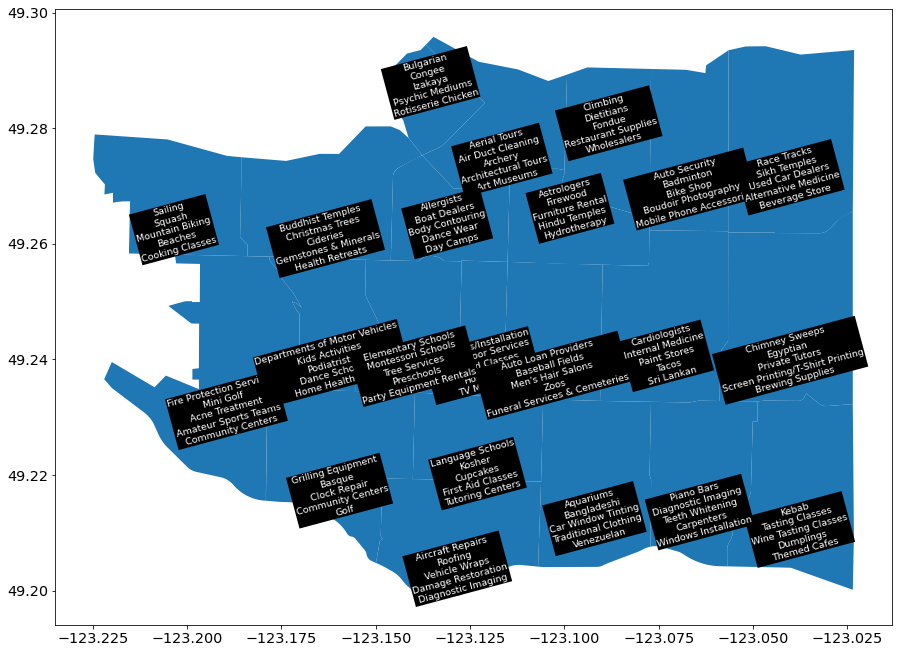

<Figure size 432x288 with 0 Axes>

In [62]:
fig,ax = plt.subplots(figsize=(15,15))
vancouvermap.plot(ax=ax); #,column='Number', legend=True);

for row in vancouvermap.iterrows():
    geo = row[1]['geometry'].centroid
    geo_len = row[1]['geometry'].length
    neighborhood = row[1]['name']
    text = ''
    for word in top_5_dict[neighborhood].keys():
        text+=word+'\n'
    text = text.strip()
    if neighborhood in ['West End','Strathcona','Mount Pleasant']:
        ax.annotate(text=text, xy=[geo.x, geo.y+0.009], color="white",ha='center',va='top',fontsize=9.5, rotation=15,
                                  bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none')
                    )
    elif neighborhood in ['Fairview']:
        ax.annotate(text=text, xy=[geo.x, geo.y+0.005], color="white",ha='center',va='top',fontsize=9.5, rotation=15,
                                  bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none')
                    )

    else:
        ax.annotate(text=text, xy=[geo.x, geo.y], color="white",ha='center',va='top',fontsize=9.5, rotation=15,
                                  bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none')
                    )

        
    # show the subplot
    ax.figure

plt.show()
plt.savefig('Images/notable biz.svg');

# Word Cloud Graphing

In [63]:
from PIL import Image
import numpy as np

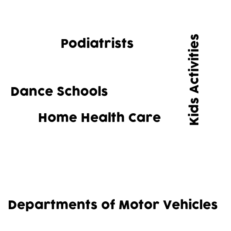

In [64]:
from wordcloud import STOPWORDS, WordCloud
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1,1)

font_path = r"fonts\Cocogoose Pro-trial.ttf"
wc = WordCloud(
    background_color="white",
    font_path=font_path,
    max_words=5,
    stopwords=STOPWORDS,
    max_font_size=256,
#     random_state=0,
#     colormap='tab10',
    width=500,
    height=500
)
wc.generate_from_frequencies(top_5_dict['Arbutus-Ridge'])
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

# Top business categories

In [65]:
vangeo_sc_df[~vangeo_sc_df['single category'].isin(yelp_categories)]['single category'].value_counts().head(10)

Coffee & Tea          879
Bars                  616
Fashion               591
Japanese              516
Specialty Food        470
Chinese               419
Sandwiches            415
Cafes                 401
Hair Salons           398
Breakfast & Brunch    397
Name: single category, dtype: int64